In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_excel('data_raw.xlsx')
df.head()

,Account,ATMID,caldate,Dispense,DT,MaxCapacity,CountTotalTxn
0,ABC,SPCN02020,2021-01-01,564500,0,2640000,157
1,ABC,TPCN10269,2021-01-01,509000,9,3520000,92
2,ABC,APCN00816,2021-01-01,64800,0,2640000,36
3,PQR,S1CN1142,2021-01-01,834500,0,3520000,101
4,PQR,S1CN2022,2021-01-01,825700,0,2860000,364


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14593 entries, 0 to 14592
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Account        14593 non-null  object        
 1   ATMID          14593 non-null  object        
 2   caldate        14593 non-null  datetime64[ns]
 3   Dispense       14593 non-null  int64         
 4   DT             14593 non-null  int64         
 5   MaxCapacity    14593 non-null  int64         
 6   CountTotalTxn  14593 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 798.2+ KB


In [4]:
df.describe()

,Dispense,DT,MaxCapacity,CountTotalTxn
count,1.459300e+04,14593.000000,1.459300e+04,14593.000000
mean,4.027993e+05,158.538614,3.279753e+06,105.322963
std,3.036762e+05,356.073765,3.974770e+05,76.727151
min,0.000000e+00,0.000000,2.420000e+06,0.000000
25%,1.685000e+05,0.000000,2.860000e+06,45.000000
50%,3.653000e+05,0.000000,3.520000e+06,98.000000
75%,5.780000e+05,64.000000,3.520000e+06,146.000000
max,2.151800e+06,1440.000000,3.740000e+06,561.000000


In [5]:
df['dayname'] = df['caldate'].dt.day_name()
df['day'] = df['caldate'].dt.day
df['month'] = df['caldate'].dt.month
df['week'] = df['caldate'].dt.isocalendar().week
df['year'] = df['caldate'].dt.isocalendar().year
df['year'] = df['year'].astype(str)
df['week'] = df['week'].astype(str)
df['unique_week'] = df['year'] + '_' + df['week']
df['year'] = df['year'].astype(int)
df['week'] = df['week'].astype(int)
df = df[df['year'] != 2020]
df.head()

,Account,ATMID,caldate,Dispense,DT,MaxCapacity,CountTotalTxn,dayname,day,month,week,year,unique_week
42,ABC,SPCN02020,2021-01-04,164600,168,2640000,65,Monday,4,1,1,2021,2021_1
43,ABC,TPCN10269,2021-01-04,781500,0,3520000,143,Monday,4,1,1,2021,2021_1
44,ABC,APCN00816,2021-01-04,63400,0,2640000,30,Monday,4,1,1,2021,2021_1
45,PQR,S1CN1142,2021-01-04,223500,0,3520000,37,Monday,4,1,1,2021,2021_1
46,PQR,S1CN2022,2021-01-04,1413500,17,2860000,374,Monday,4,1,1,2021,2021_1


In [6]:
max_capacity = df.loc[:, ['MaxCapacity', 'ATMID', 'Account']].drop_duplicates()
max_capacity.reset_index(inplace=True, drop=True)
max_capacity

,MaxCapacity,ATMID,Account
0,2640000,SPCN02020,ABC
1,3520000,TPCN10269,ABC
2,2640000,APCN00816,ABC
3,3520000,S1CN1142,PQR
4,2860000,S1CN2022,PQR
5,3520000,SPCND067,PQR
6,3520000,APAN11109,ABC
7,3740000,APAN23217,ABC
8,3520000,SPCNG376,PQR
9,3520000,S1CN3514,PQR


,ATMID,unique_week,year,week,Dispense,DT,CountTotalTxn,MaxCapacity,Account,utilization
0,APAN11109,2021_1,2021,1,1767500,6229,545,3520000,ABC,0.502131
11,APAN11109,2021_2,2021,2,3373500,2459,930,3520000,ABC,0.958381
22,APAN11109,2021_3,2021,3,1423000,6117,376,3520000,ABC,0.404261
33,APAN11109,2021_4,2021,4,1774000,1873,551,3520000,ABC,0.503977
44,APAN11109,2021_5,2021,5,2913500,1554,791,3520000,ABC,0.827699
48,APAN11109,2021_6,2021,6,4094500,3152,1004,3520000,ABC,1.163210
49,APAN11109,2021_7,2021,7,3097500,2471,934,3520000,ABC,0.879972
50,APAN11109,2021_8,2021,8,1650000,2632,473,3520000,ABC,0.468750
51,APAN11109,2021_9,2021,9,2253500,3600,613,3520000,ABC,0.640199
1,APAN11109,2021_10,2021,10,993500,7914,327,3520000,ABC,0.282244


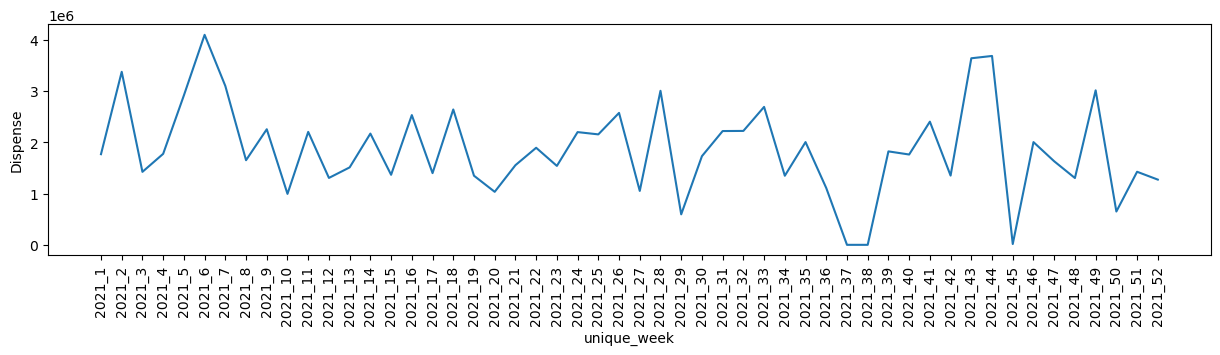

In [7]:
agg_weeklevel_data = df.groupby(['ATMID', 'unique_week', 'year', 'week'])[['Dispense', 'DT', 'CountTotalTxn']].sum().reset_index()
agg_weeklevel_data = agg_weeklevel_data.merge(max_capacity, on='ATMID')
agg_weeklevel_data['utilization'] = agg_weeklevel_data['Dispense']/agg_weeklevel_data['MaxCapacity']
agg_weeklevel_data.sort_values(by=['ATMID', 'year', 'week'], inplace=True)
plt.figure(figsize=(15,3))
plt.xticks(rotation=90)
sns.lineplot(data=agg_weeklevel_data[agg_weeklevel_data['ATMID'] == 'APAN11109'].head(52), x='unique_week', y='Dispense')
agg_weeklevel_data.head(52)

In [8]:
agg_weeklevel_data.groupby('ATMID')['Dispense'].describe().reset_index()

,ATMID,count,mean,std,min,25%,50%,75%,max
0,APAN11109,112.0,2.086500e+06,8.603127e+05,0.0,1549500.0,2083500.0,2598750.0,5723000.0
1,APAN22403,112.0,2.799464e+06,1.300140e+06,0.0,1995250.0,2807250.0,3540650.0,6886000.0
2,APAN23217,112.0,3.319217e+06,1.355064e+06,213000.0,2419775.0,3136000.0,4270450.0,8026300.0
3,APAN35706,112.0,6.004929e+05,4.349849e+05,0.0,241350.0,520550.0,857150.0,2197500.0
4,APCN00816,112.0,7.385696e+05,2.346803e+05,202600.0,603350.0,722850.0,903600.0,1359500.0
5,S1CN1142,112.0,1.781239e+06,9.539630e+05,0.0,1123625.0,1675750.0,2382625.0,4556500.0
6,S1CN2011,73.0,1.030273e+06,5.834219e+05,141000.0,608500.0,919500.0,1397000.0,2901700.0
7,S1CN2022,112.0,4.661402e+06,1.715781e+06,587100.0,3457450.0,4552000.0,5804025.0,9030700.0
8,S1CN2820,112.0,2.612273e+06,8.045367e+05,0.0,2078550.0,2555100.0,3252200.0,4553800.0
9,S1CN3514,112.0,3.307799e+06,1.163995e+06,0.0,2626625.0,3294250.0,4111125.0,5723000.0


### Outlier Check

<Axes: xlabel='Dispense'>

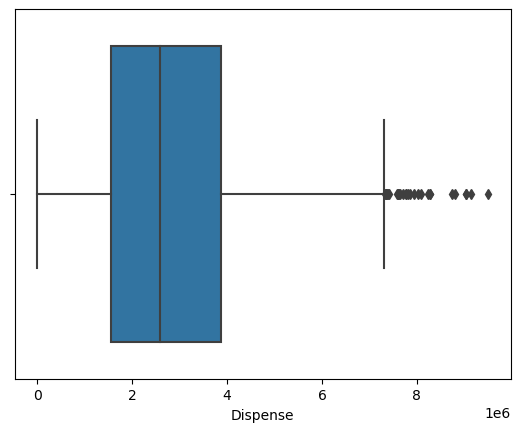

In [9]:
sns.boxplot(x=agg_weeklevel_data['Dispense'])

In [10]:
iqr = agg_weeklevel_data['Dispense'].quantile(0.75) - agg_weeklevel_data['Dispense'].quantile(0.25)
lqr = agg_weeklevel_data['Dispense'].quantile(0.25) - 1.5 * iqr
uqr = agg_weeklevel_data['Dispense'].quantile(0.25) + 1.5 * iqr
agg_weeklevel_data[(agg_weeklevel_data['Dispense'] <= lqr) | (agg_weeklevel_data['Dispense'] >= uqr)]

,ATMID,unique_week,year,week,Dispense,DT,CountTotalTxn,MaxCapacity,Account,utilization
88,APAN11109,2022_42,2022,42,5723000,297,1177,3520000,ABC,1.625852
168,APAN22403,2022_13,2022,13,5614600,28,1191,2420000,ABC,2.320083
169,APAN22403,2022_14,2022,14,6886000,29,1315,2420000,ABC,2.845455
188,APAN22403,2022_31,2022,31,5682700,52,1090,2420000,ABC,2.348223
248,APAN23217,2021_31,2021,31,5970800,432,1427,3740000,ABC,1.596471
...,...,...,...,...,...,...,...,...,...,...
2076,TPCN10269,2022_48,2022,48,6568100,1452,845,3520000,ABC,1.865938
2077,TPCN10269,2022_49,2022,49,6219900,1048,849,3520000,ABC,1.767017
2079,TPCN10269,2022_50,2022,50,5684700,147,786,3520000,ABC,1.614972
2080,TPCN10269,2022_51,2022,51,5400600,826,805,3520000,ABC,1.534261


### Check Over Utilized ATM

Let's see how many % of weeks the ATMs are overutilized i.e, dispensed amount is more than max capacity 

<Axes: xlabel='ATMID', ylabel='over_utilized_week'>

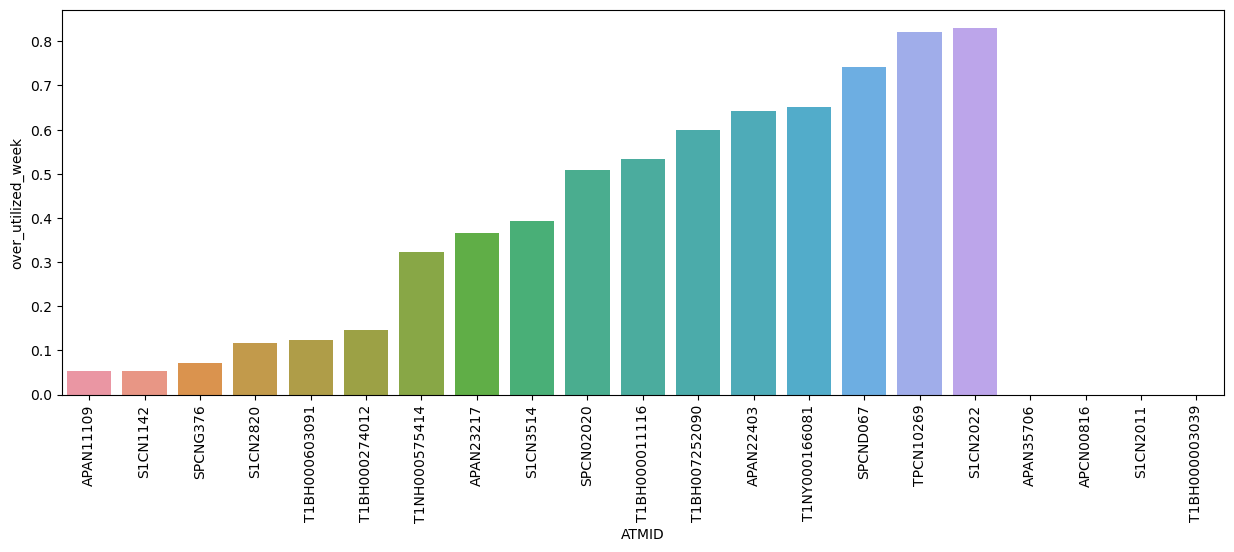

In [11]:
over_utilized = pd.DataFrame(agg_weeklevel_data[(agg_weeklevel_data['utilization'] > 1)].groupby('ATMID')['unique_week'].nunique()/agg_weeklevel_data.groupby('ATMID')['unique_week'].nunique())
over_utilized.reset_index(inplace=True)
over_utilized.rename(columns={'unique_week':'over_utilized_week'}, inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(data=over_utilized, x='ATMID', y='over_utilized_week', order=over_utilized.sort_values('over_utilized_week').ATMID)

So the above graph state, we need to load cash more than once a week 

### Check ATM which goes frequently down 

<Axes: xlabel='ATMID', ylabel='DT'>

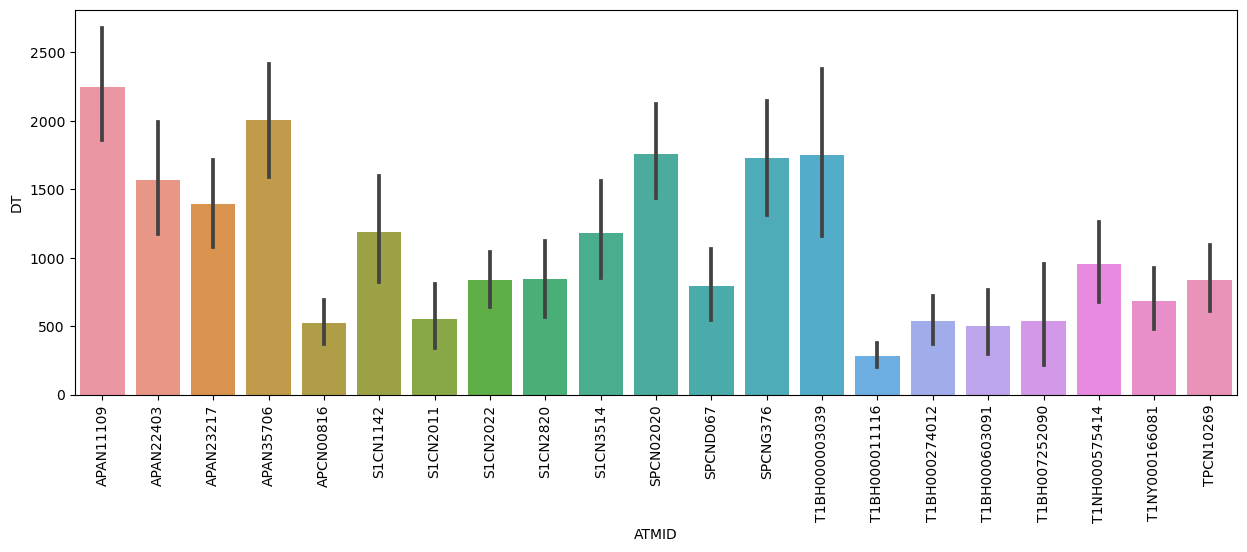

In [12]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(data=agg_weeklevel_data, x='ATMID', y='DT')

### Let's see if there is any corelation between downtime and utilization

<Axes: >

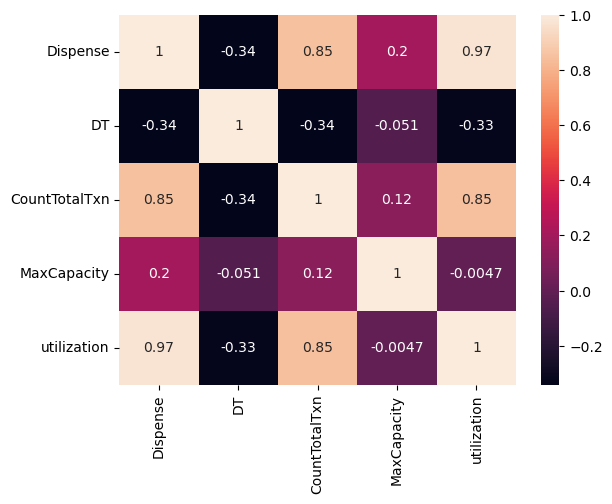

In [13]:
sns.heatmap(agg_weeklevel_data.loc[:, ['Dispense', 'DT', 'CountTotalTxn', 'MaxCapacity', 'utilization']].corr(), annot=True, )

We can see utilization is negatively correlated with downtime. When utilization increases then ATM goes down due to out of cash.

### Decomposition
Let's dicompose the dispense trend to understand trend, seasonality and outlier
##### Additional

In [14]:
# agg_weeklevel_data.index = agg_weeklevel_data.unique_week
agg_weeklevel_data.head()

,ATMID,unique_week,year,week,Dispense,DT,CountTotalTxn,MaxCapacity,Account,utilization
0,APAN11109,2021_1,2021,1,1767500,6229,545,3520000,ABC,0.502131
11,APAN11109,2021_2,2021,2,3373500,2459,930,3520000,ABC,0.958381
22,APAN11109,2021_3,2021,3,1423000,6117,376,3520000,ABC,0.404261
33,APAN11109,2021_4,2021,4,1774000,1873,551,3520000,ABC,0.503977
44,APAN11109,2021_5,2021,5,2913500,1554,791,3520000,ABC,0.827699


In [15]:
atm_week_wise_dispense = agg_weeklevel_data.pivot_table(columns=['ATMID'], values=['Dispense'], index='unique_week')
last_24_week_dispense = atm_week_wise_dispense.iloc[-24:, :]
last_24_week_dispense

Dispense                                                         \
ATMID        APAN11109  APAN22403  APAN23217  APAN35706  APCN00816   S1CN1142   
unique_week                                                                     
2022_42      5723000.0  3129300.0  3932700.0   655500.0   224600.0  1569700.0   
2022_43      1776500.0  1759900.0  3758500.0   374000.0   418200.0  1441500.0   
2022_44      2080500.0  3947800.0  5683800.0   549700.0  1130200.0  1945500.0   
2022_45      2625000.0  3865300.0  4466500.0   999700.0   859700.0  1783200.0   
2022_46      2798000.0  2817500.0  1975400.0   915400.0   763400.0  1837800.0   
2022_47      2204000.0  2471600.0  3624700.0   733200.0   202600.0   996500.0   
2022_48      2404000.0  3897000.0  5565200.0   505100.0   869300.0  1070000.0   
2022_49      2732000.0  4231000.0  4145700.0  1177900.0   414400.0  1389500.0   
2022_5       2451000.0  2639500.0  2631600.0   980500.0   663600.0  2761500.0   
2022_50      2691500.0  3209500.0  3848100.0   398500.0   240500.0   792000.0   
2022_51      2814500.0  2470000.0  3066100.0  1156200.0   608500.0  1080500.0   
2022_52      1997500.0  3372500.0  2512000.0   184500.0   740500.0   158600.0   
2022_6       2025500.0  1993000.0  3016700.0   580000.0   962400.0  3686000.0   
2022_7       2184500.0  1263000.0  2310100.0   635500.0   476700.0  2659500.0   
2022_8       1507500.0  1043500.0  3116700.0   281500.0   623300.0  2437000.0   
2022_9       1583500.0  1774900.0  3489700.0    77100.0   756600.0  2894000.0   
2023_1       3211000.0  3739500.0  5848700.0   866000.0   968000.0    33200.0   
2023_2       3304500.0  2407000.0  3744900.0   554400.0  1019500.0        0.0   
2023_3       2414000.0  1490500.0  2716700.0   622600.0   344000.0   191000.0   
2023_4       2377500.0  2167500.0  3049900.0   542700.0   722500.0   325500.0   
2023_5       2991000.0  3116500.0  5831400.0   772000.0  1244000.0   805000.0   
2023_6       3969000.0  1655500.0  4610500.0   551000.0  1218500.0   441500.0   
2023_7       2715000.0  3461000.0  3648200.0   893200.0   568500.0   902500.0   
2023_8        978000.0  1811000.0  1303100.0   301800.0   354000.0   202000.0   

                                                         ...             \
ATMID         S1CN2011   S1CN2022   S1CN2820   S1CN3514  ...   SPCND067   
unique_week                                              ...              
2022_42      1752400.0  4241700.0  4553800.0  4126000.0  ...  7346000.0   
2022_43       555500.0  2918300.0  1446200.0  3509000.0  ...  5497000.0   
2022_44      2387000.0  6530200.0  3413700.0  4918000.0  ...  6026500.0   
2022_45      1601400.0  5194900.0  3547000.0  5049000.0  ...  2137500.0   
2022_46      1279800.0  3586200.0  3034500.0  4116000.0  ...  4843500.0   
2022_47       961800.0  2511100.0  2623300.0  2990000.0  ...  5693000.0   
2022_48      1652600.0  5844000.0  3708000.0  4484500.0  ...  4729000.0   
2022_49      2457000.0  5458700.0  4250000.0  5140500.0  ...  5400500.0   
2022_5        907000.0  5928900.0  2071500.0  4109500.0  ...  5037000.0   
2022_50      1572500.0  4260500.0  3465000.0  3179000.0  ...  4381500.0   
2022_51       821500.0  2651900.0  2583500.0  3658000.0  ...  5247500.0   
2022_52      1474200.0  3665400.0  2791000.0  3795500.0  ...  4897500.0   
2022_6        608500.0  4500200.0  2636000.0  3486000.0  ...  4210500.0   
2022_7        423000.0  4198700.0  3180000.0  3296500.0  ...  3266500.0   
2022_8        369500.0  4716300.0  2291500.0  3129000.0  ...  4688500.0   
2022_9       1220500.0  7696400.0  3389100.0  3720500.0  ...  4756500.0   
2023_1       1713100.0  4832500.0  3457000.0  4566500.0  ...  5954000.0   
2023_2       1321000.0  4247900.0  4146000.0  5241000.0  ...  4493000.0   
2023_3       1043000.0  3322000.0  1997500.0  3097500.0  ...  4641500.0   
2023_4        778500.0  2447600.0  2073500.0  2842000.0  ...  4794500.0   
2023_5       1869400.0  4450600.0  3613000.0  4864000.0  ...  5547500.0   
2023_6       1641200.0  56

In [16]:
last_24_week_dispense.columns = [col[1] for col in last_24_week_dispense.columns]
last_24_week_dispense.head()

,APAN11109,APAN22403,APAN23217,APAN35706,APCN00816,S1CN1142,S1CN2011,S1CN2022,S1CN2820,S1CN3514,...,SPCND067,SPCNG376,T1BH000003039,T1BH000011116,T1BH000274012,T1BH000603091,T1BH007252090,T1NH000575414,T1NY000166081,TPCN10269
unique_week,,,,,,,,,,,,,,,,,,,,,
2022_42,5723000.0,3129300.0,3932700.0,655500.0,224600.0,1569700.0,1752400.0,4241700.0,4553800.0,4126000.0,...,7346000.0,2248000.0,2934500.0,4361000.0,3349000.0,3579500.0,3837200.0,3601500.0,2185100.0,7616000.0
2022_43,1776500.0,1759900.0,3758500.0,374000.0,418200.0,1441500.0,555500.0,2918300.0,1446200.0,3509000.0,...,5497000.0,1313000.0,2364000.0,4190400.0,1030400.0,1799000.0,4416200.0,2959000.0,3361700.0,3790500.0
2022_44,2080500.0,3947800.0,5683800.0,549700.0,1130200.0,1945500.0,2387000.0,6530200.0,3413700.0,4918000.0,...,6026500.0,1125000.0,2513000.0,5111200.0,2151500.0,4909000.0,5577300.0,2147000.0,3110500.0,6810500.0
2022_45,2625000.0,3865300.0,4466500.0,999700.0,859700.0,1783200.0,1601400.0,5194900.0,3547000.0,5049000.0,...,2137500.0,1596000.0,2372000.0,3584700.0,2354700.0,2232000.0,5404000.0,2757500.0,2301400.0,7948500.0
2022_46,2798000.0,2817500.0,1975400.0,915400.0,763400.0,1837800.0,1279800.0,3586200.0,3034500.0,4116000.0,...,4843500.0,14500.0,2194000.0,3626900.0,2123000.0,2528500.0,3503100.0,2535000.0,2785200.0,7333100.0


ATMID: APAN11109


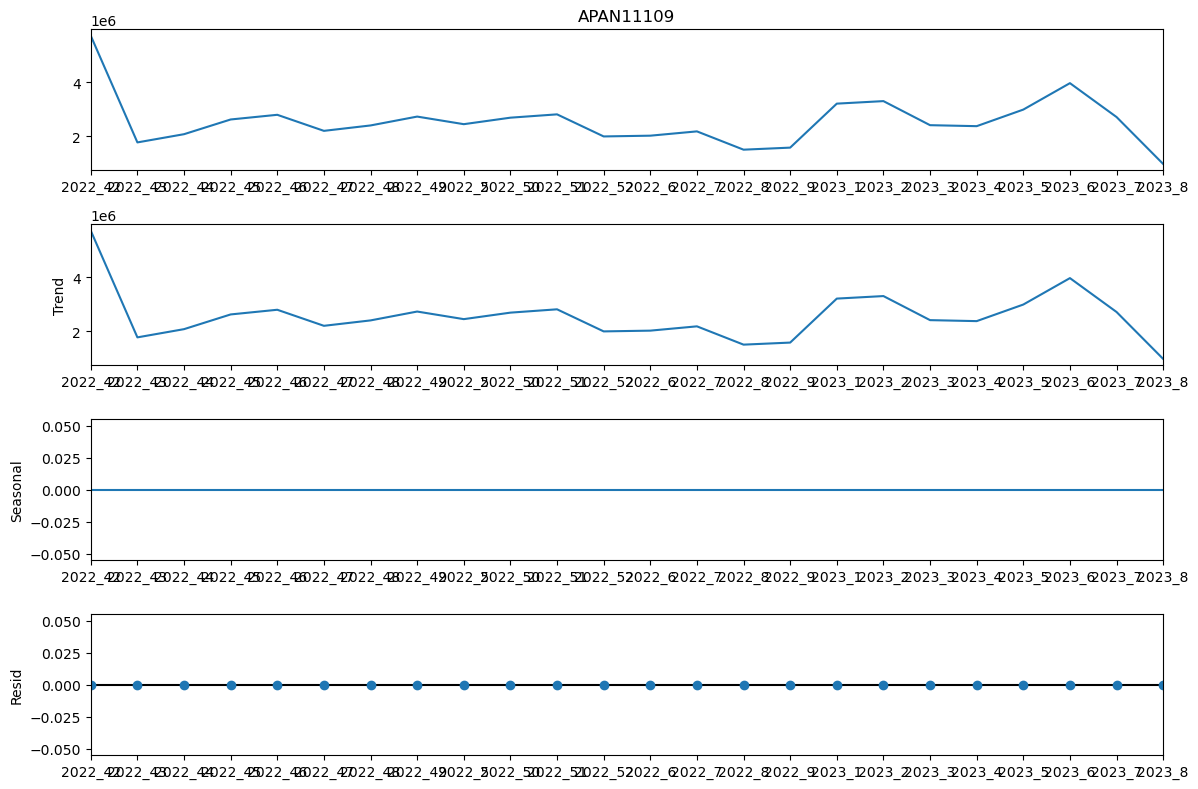

ATMID: APAN22403


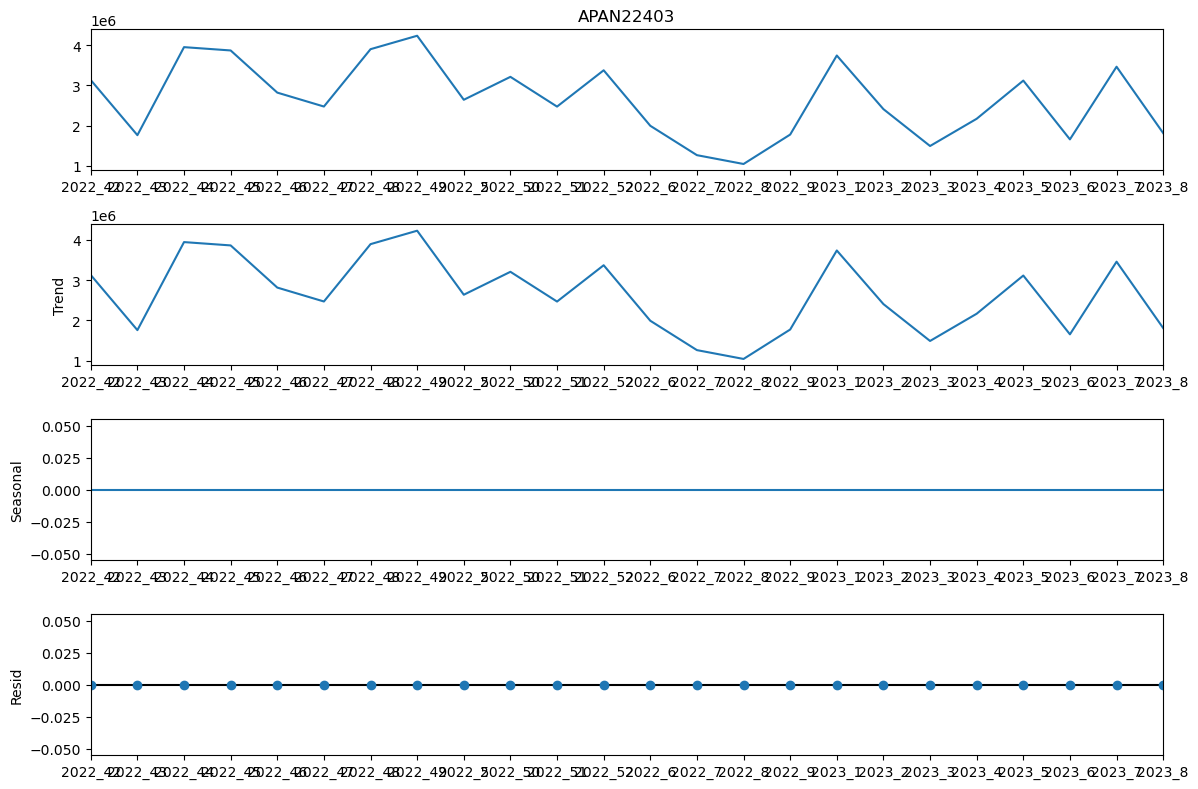

ATMID: APAN23217


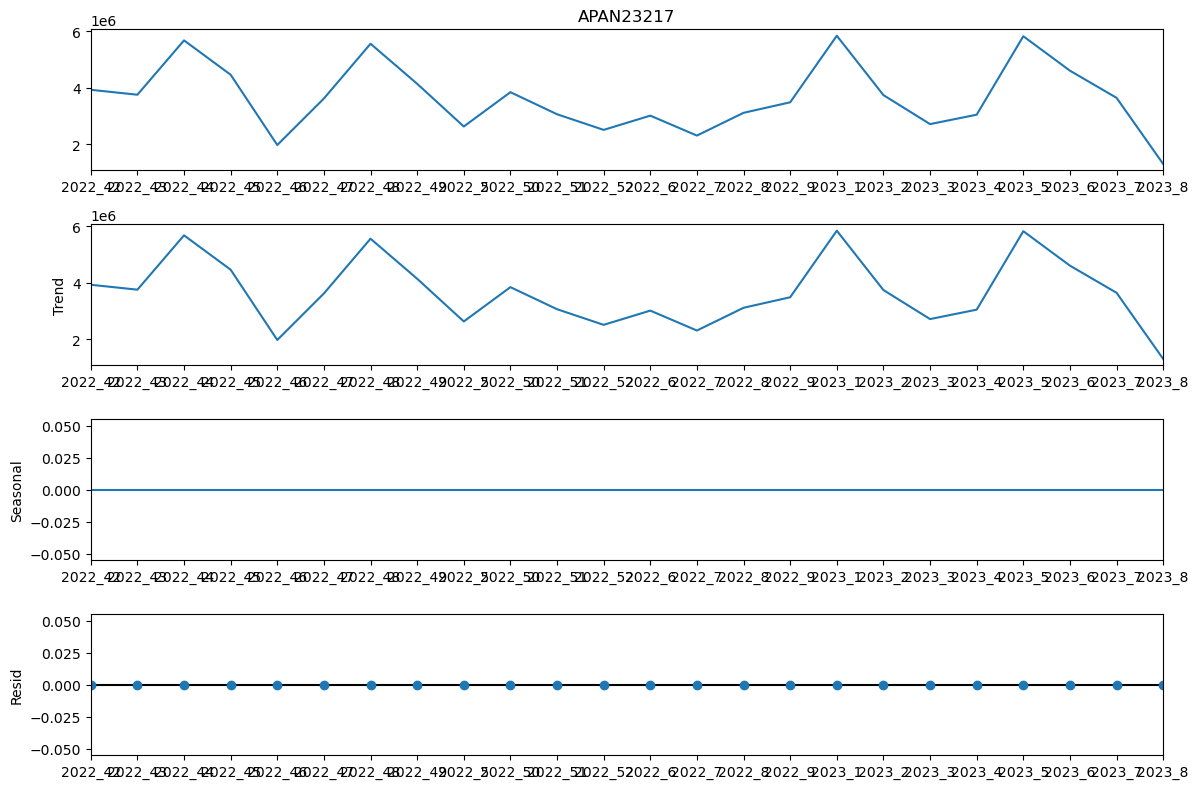

ATMID: APAN35706


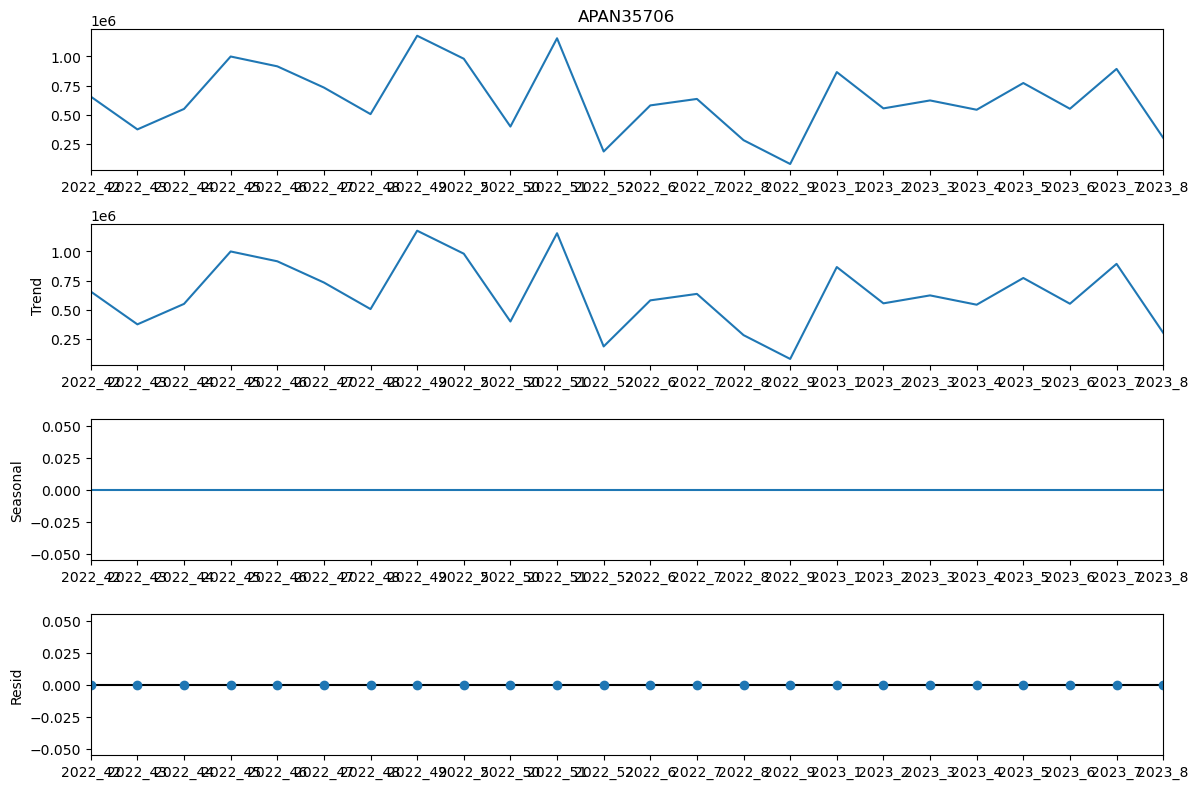

ATMID: APCN00816


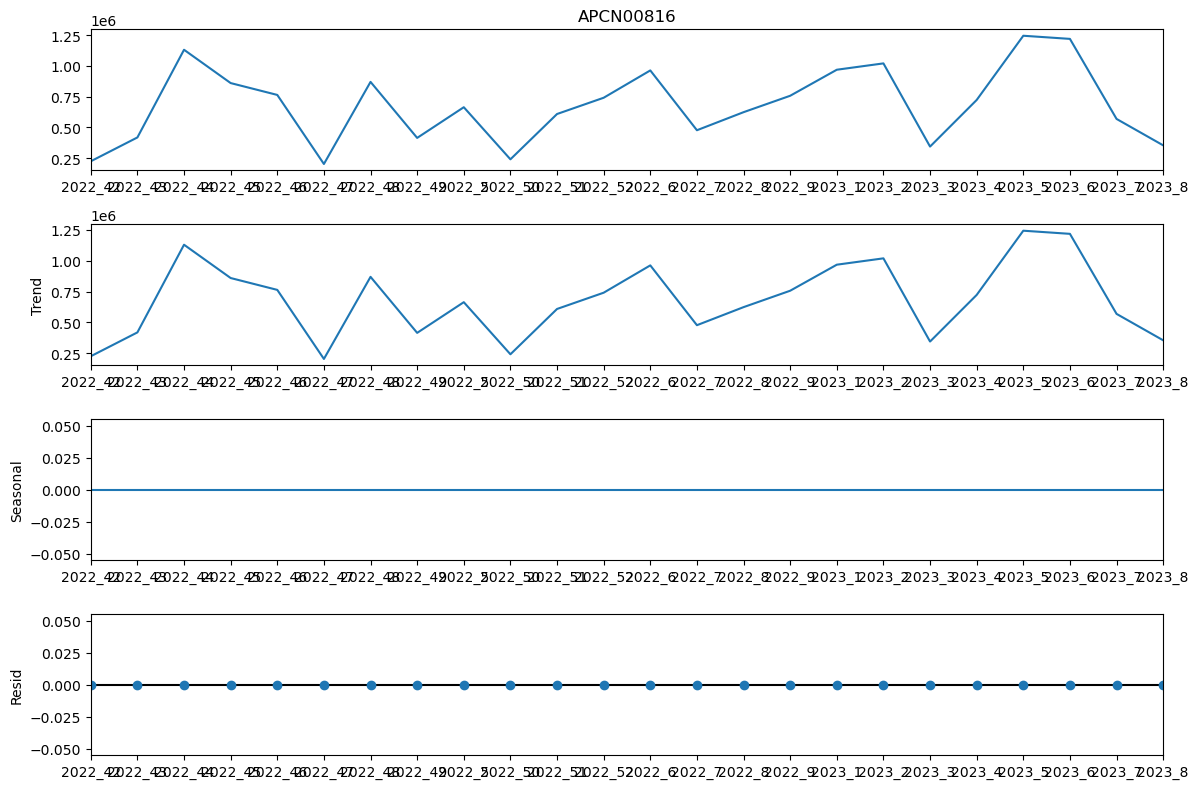

ATMID: S1CN1142


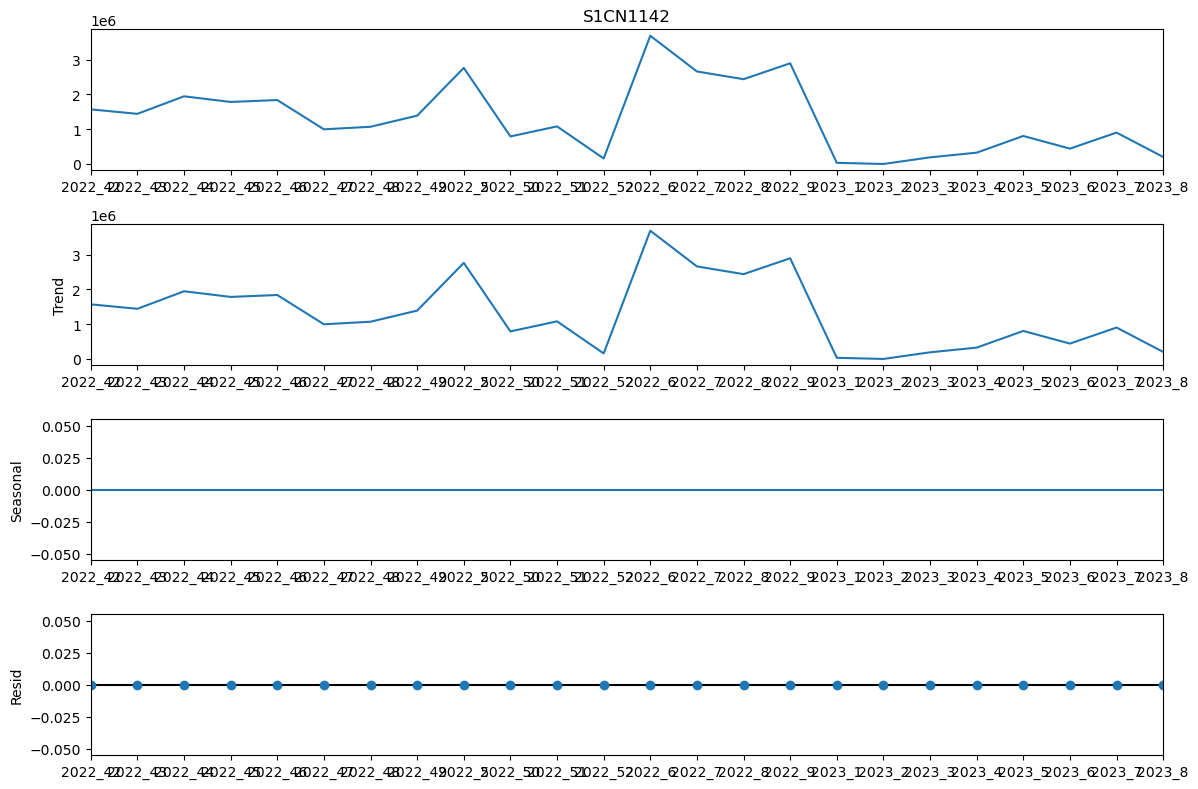

ATMID: S1CN2011


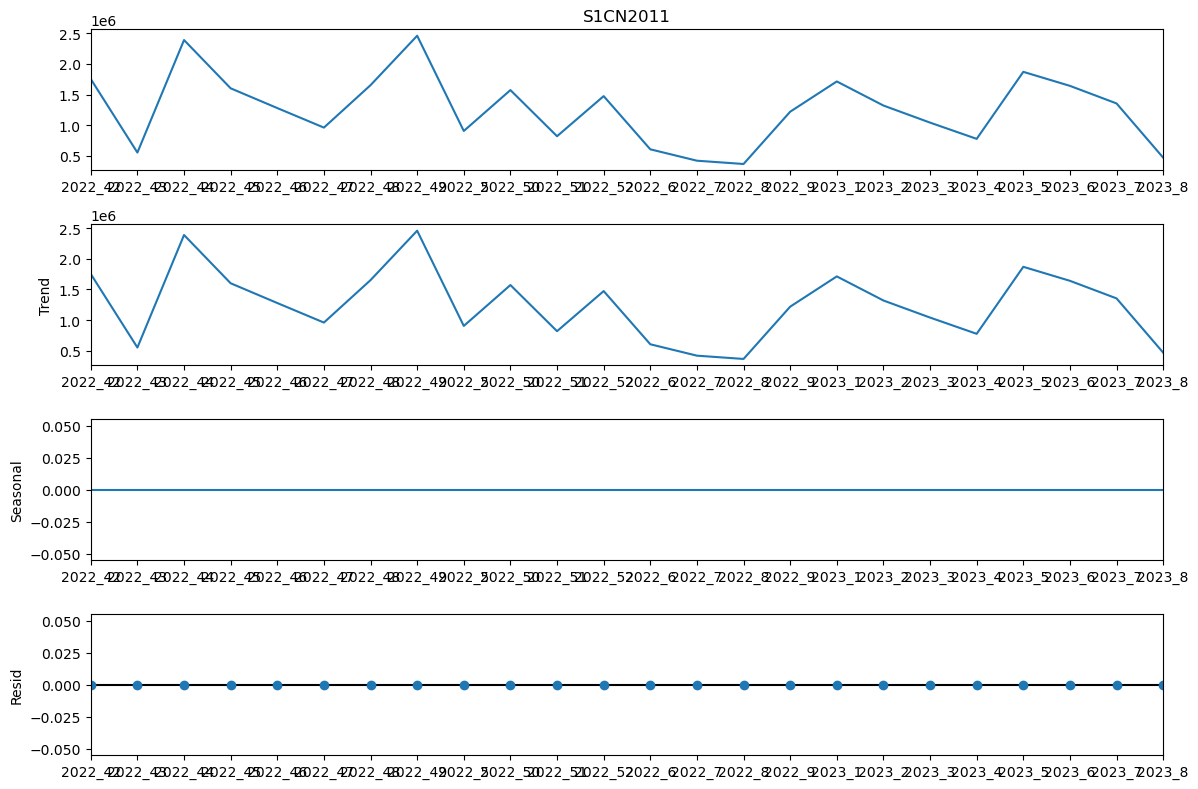

ATMID: S1CN2022


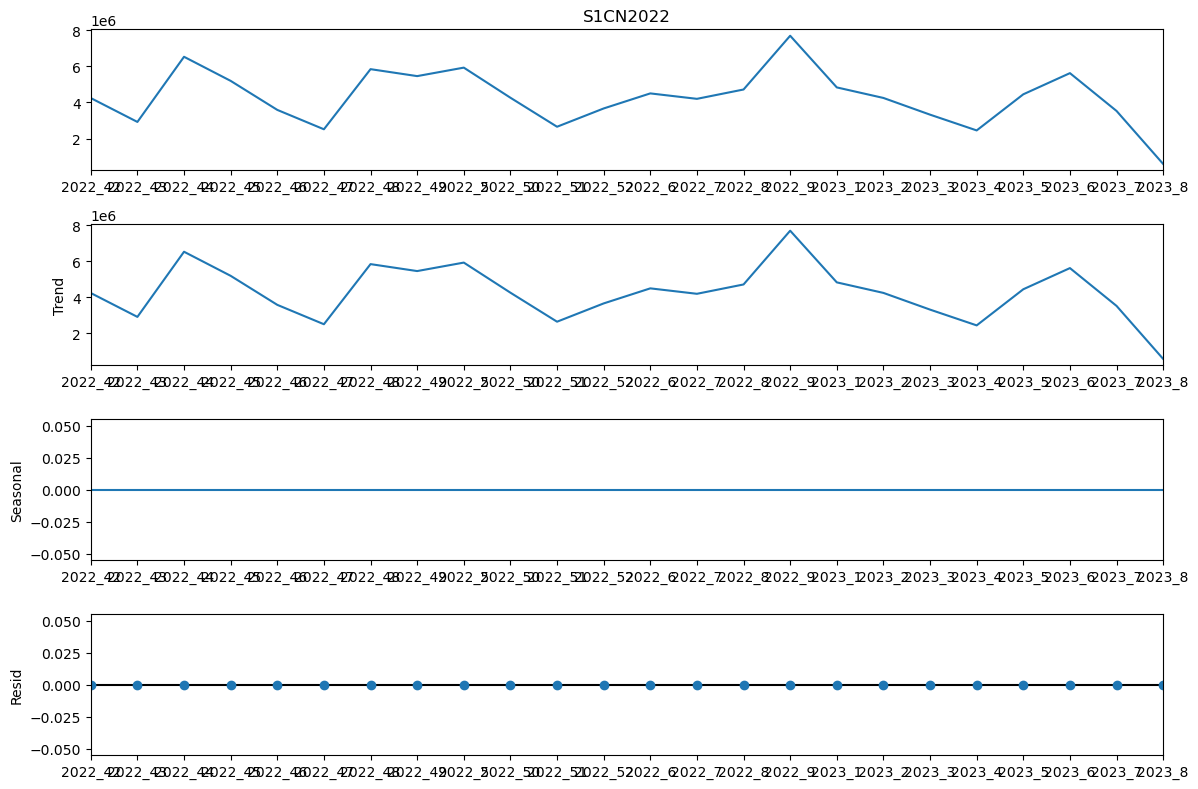

ATMID: S1CN2820


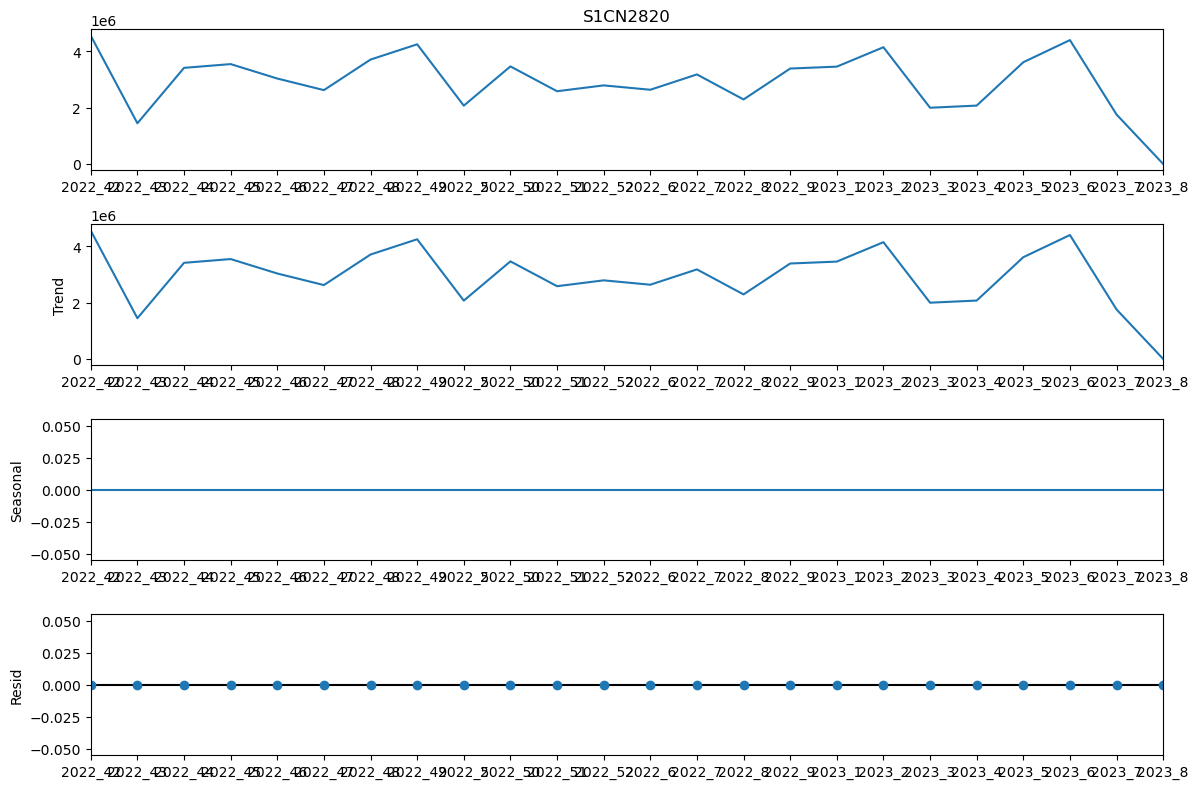

ATMID: S1CN3514


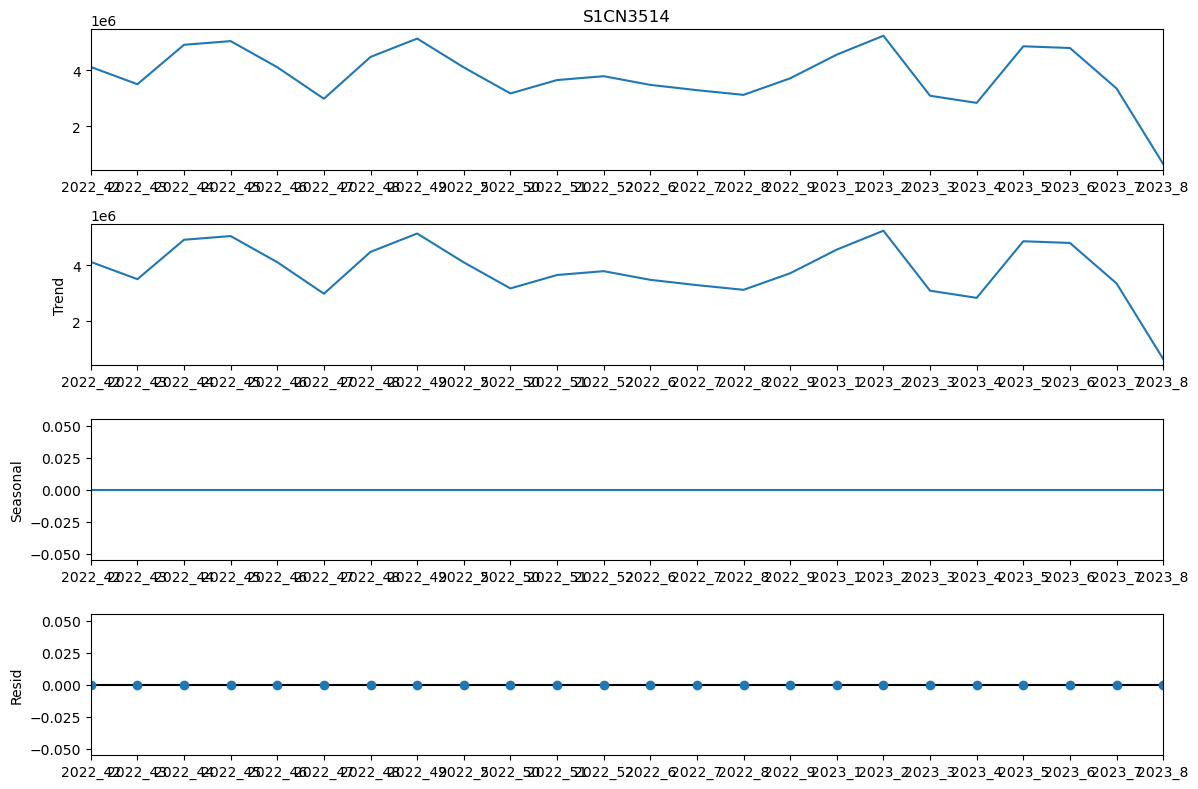

ATMID: SPCN02020


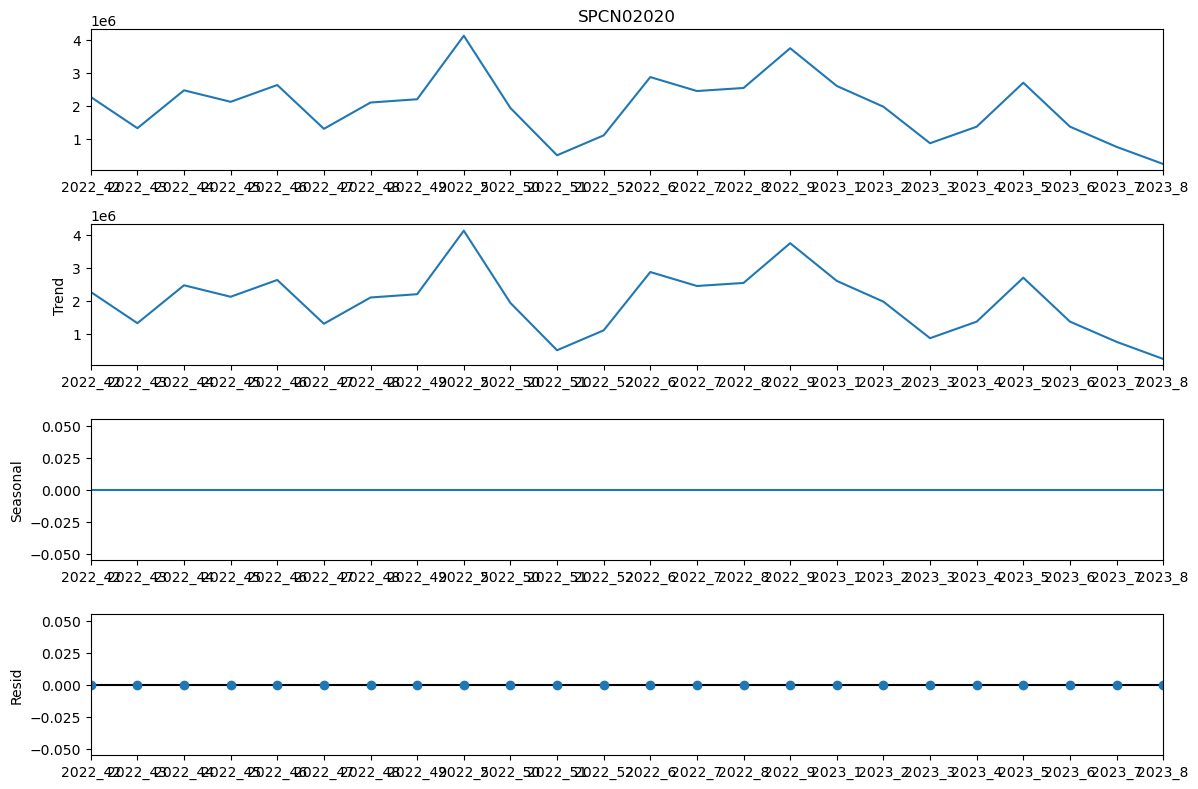

ATMID: SPCND067


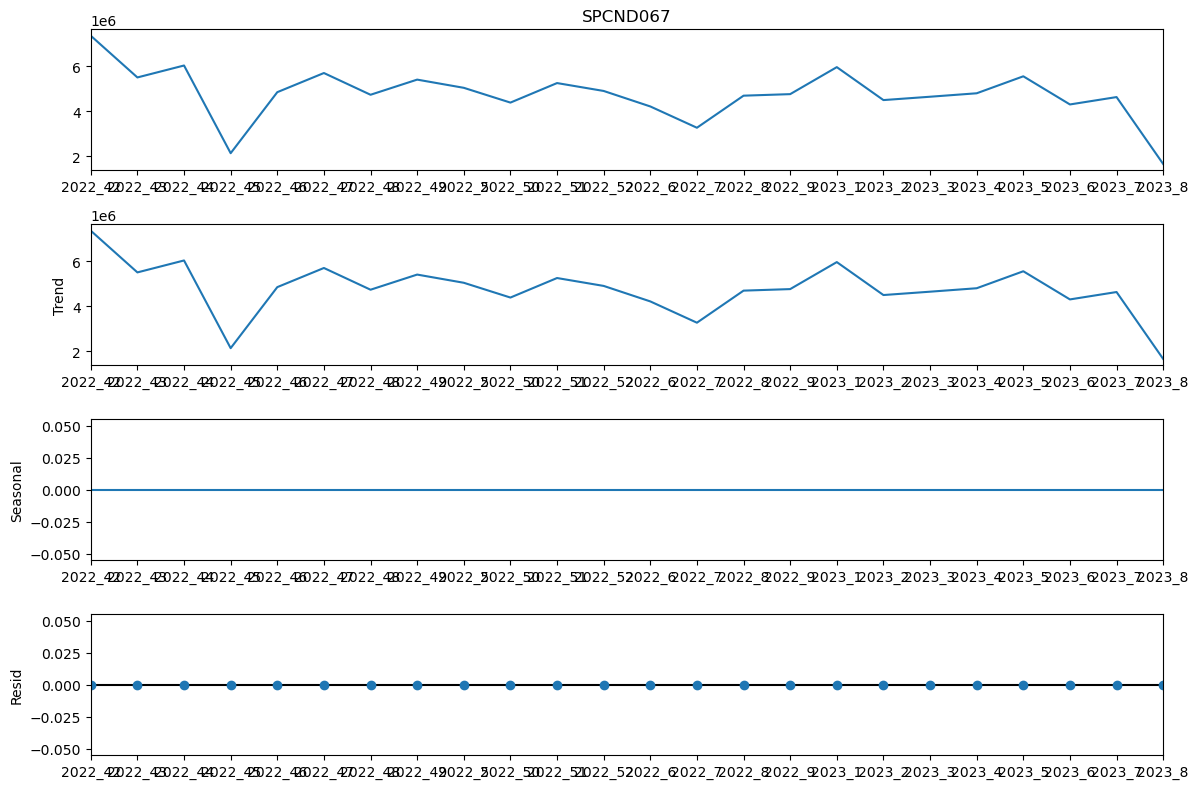

ATMID: SPCNG376


In [ ]:
for atm in agg_weeklevel_data['ATMID'].unique():
    try:
        print('ATMID:', atm)
#         tempdata = last_24_week_dispense[agg_weeklevel_data['ATMID'] == atm]
#         tempdata.sort_values(by=['year', 'week'], inplace=True)
        rcParams['figure.figsize'] = 12,8
        decomposiotion = sm.tsa.seasonal_decompose(x=last_24_week_dispense[atm],period=1, model='additive')
        fig = decomposiotion.plot()
        plt.show()
    except Exception as e:
        print(e)
        pass

ATMID: APAN11109


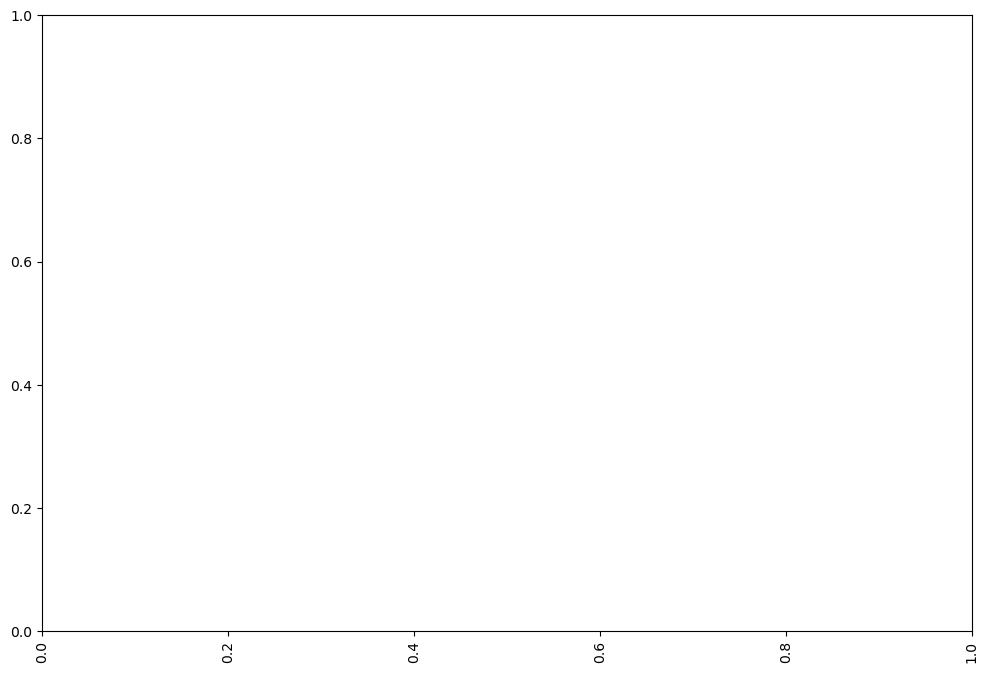

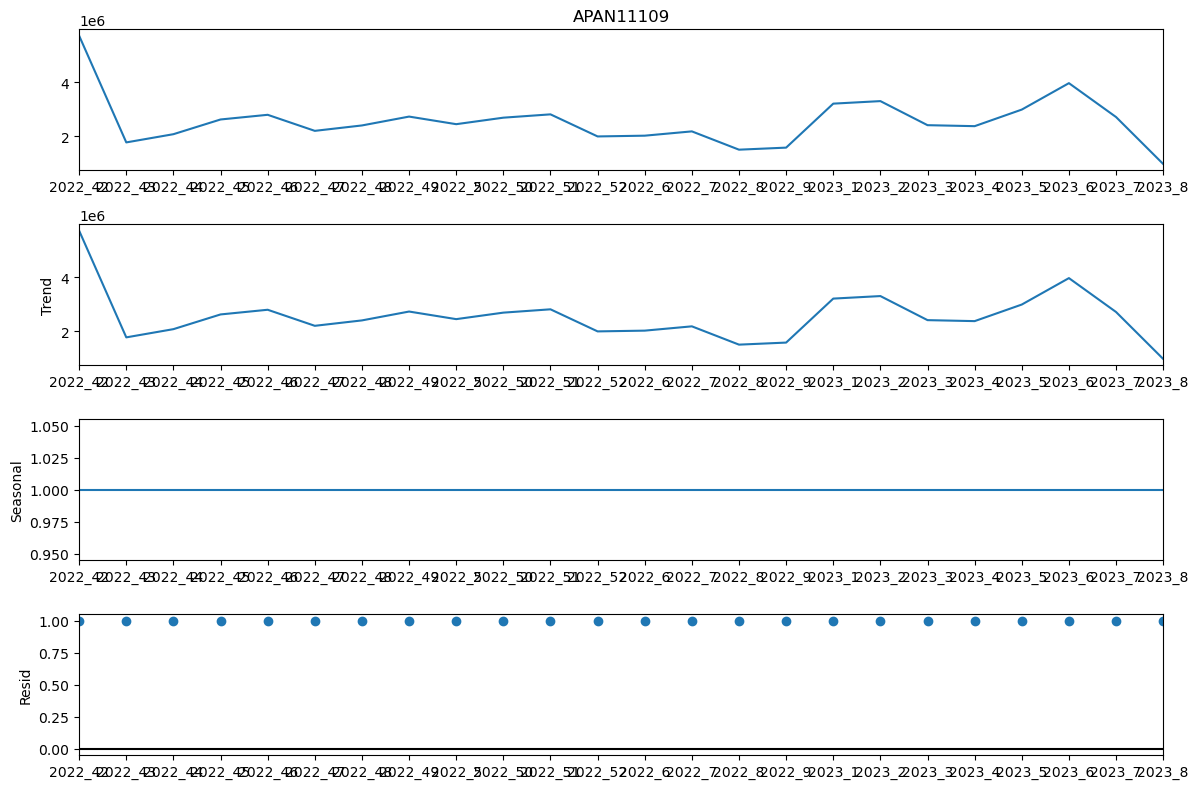

ATMID: APAN22403


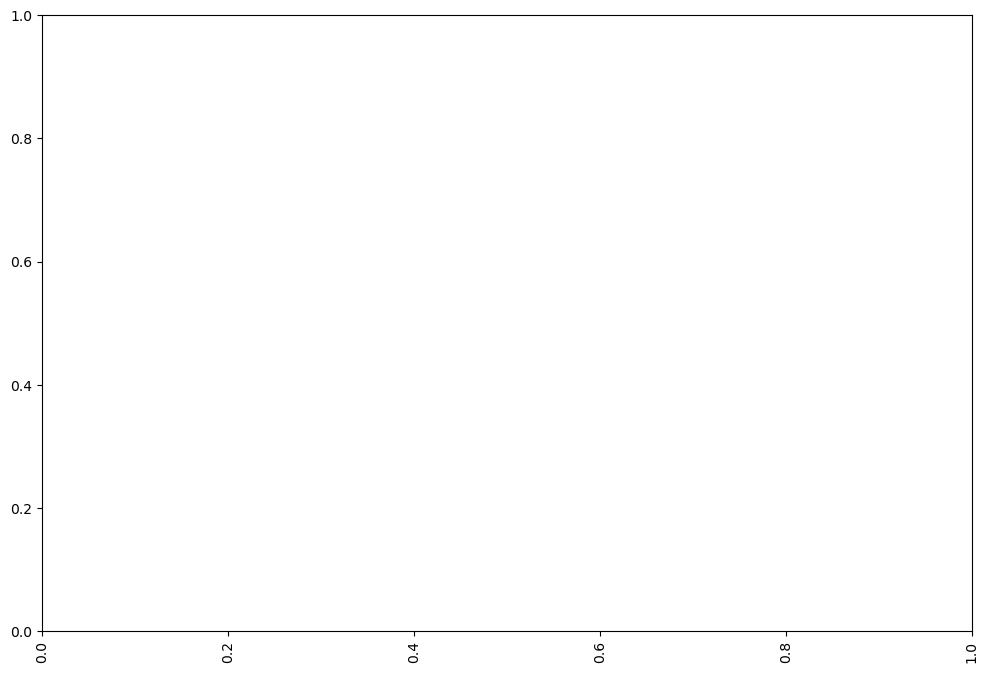

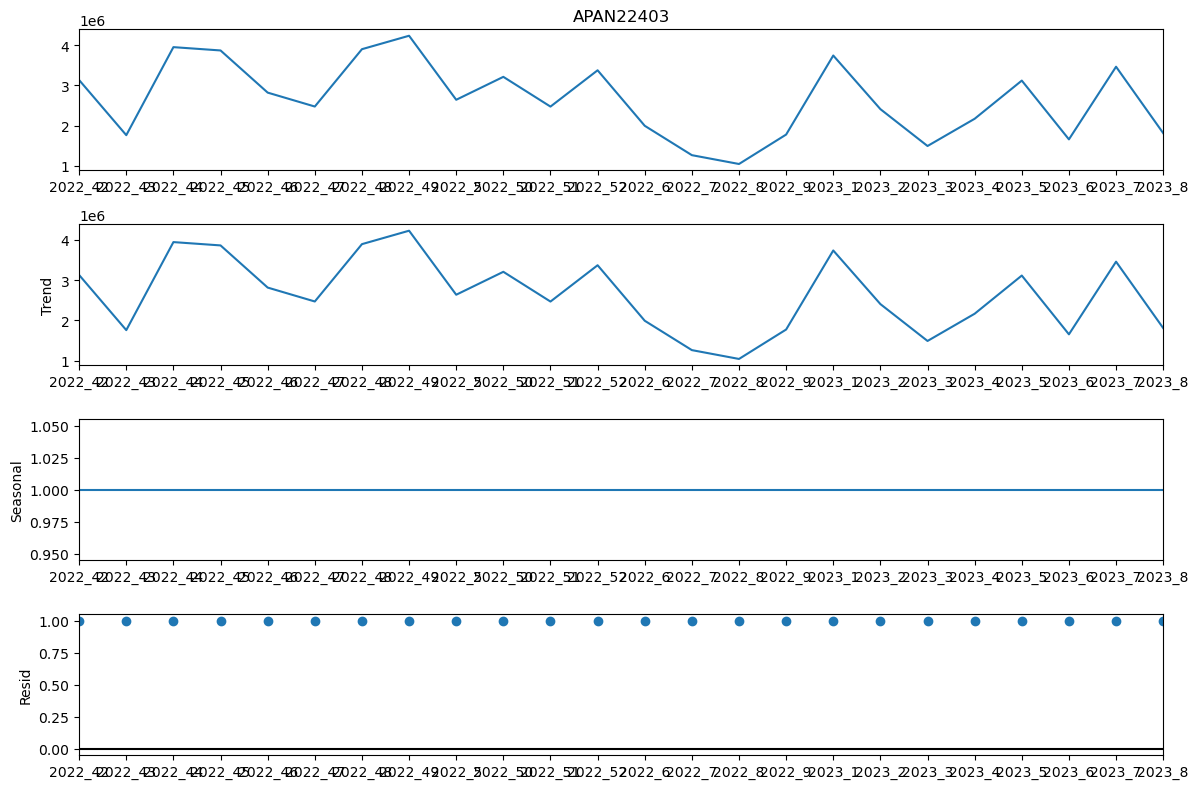

ATMID: APAN23217


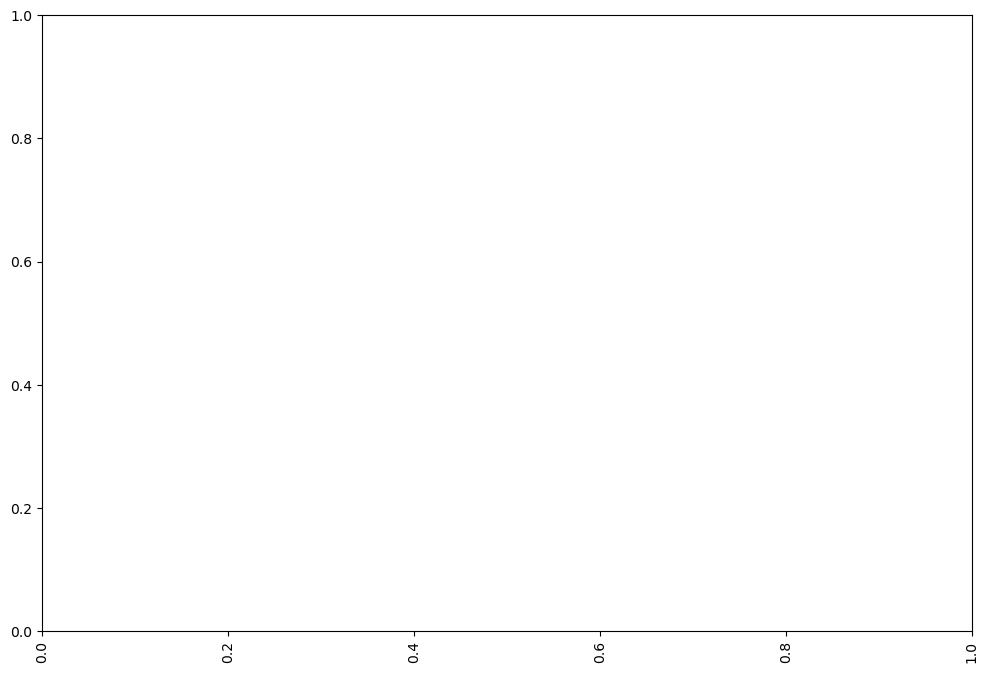

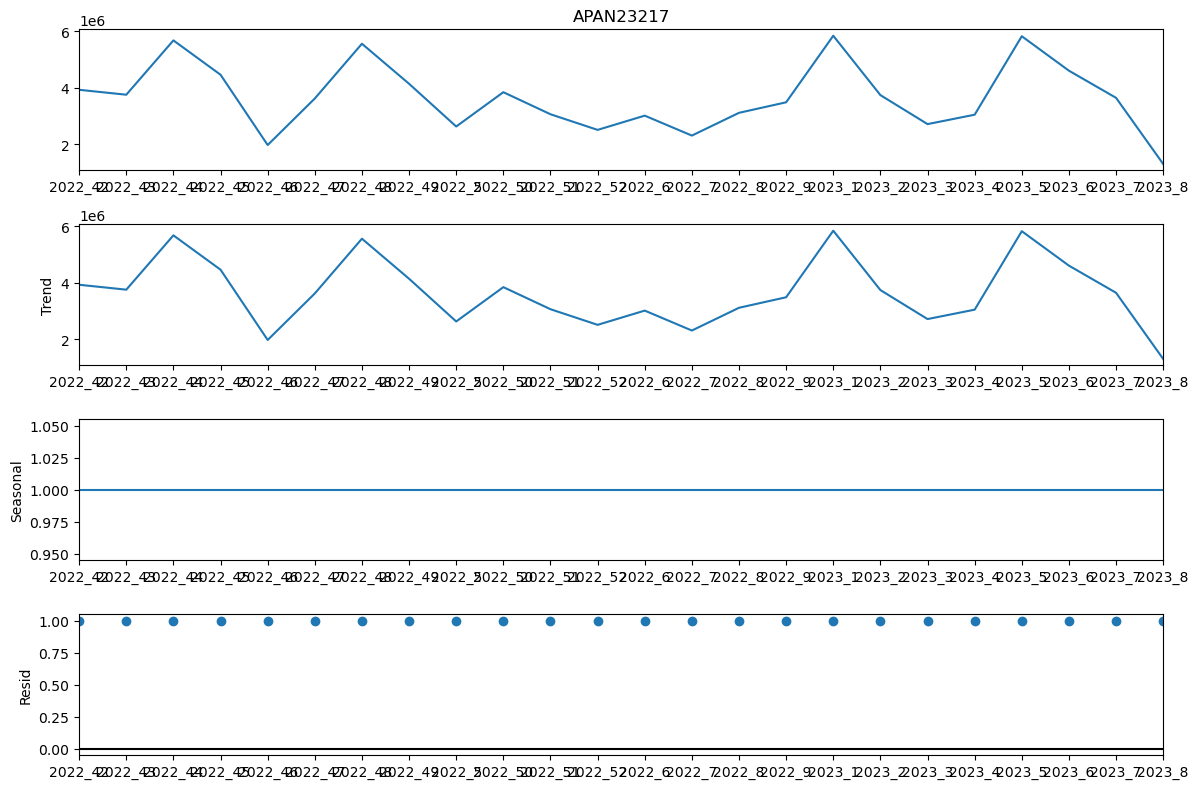

ATMID: APAN35706


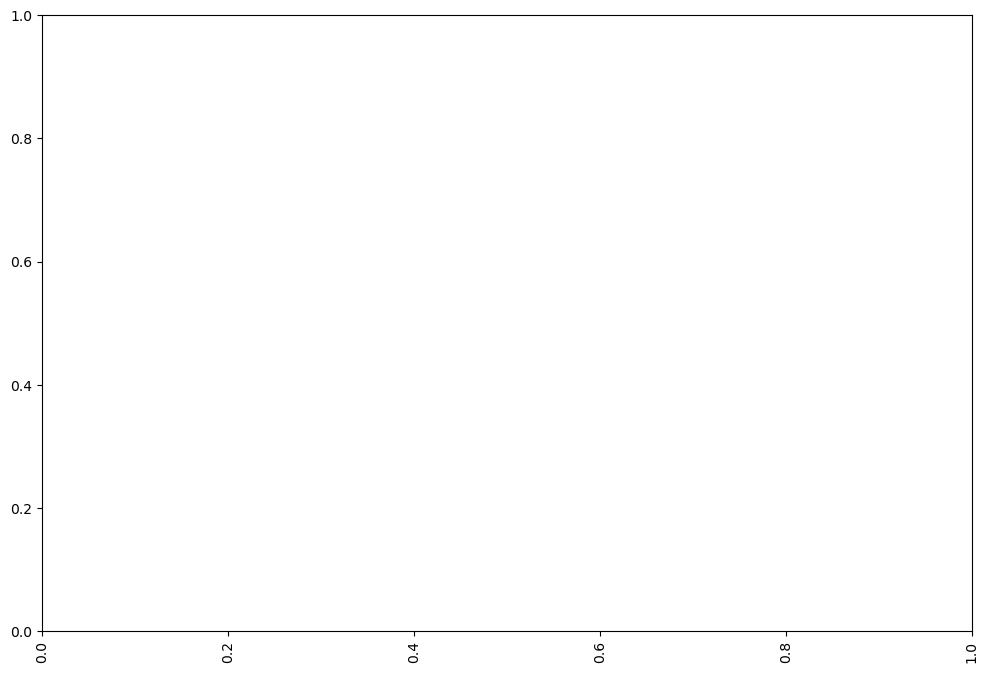

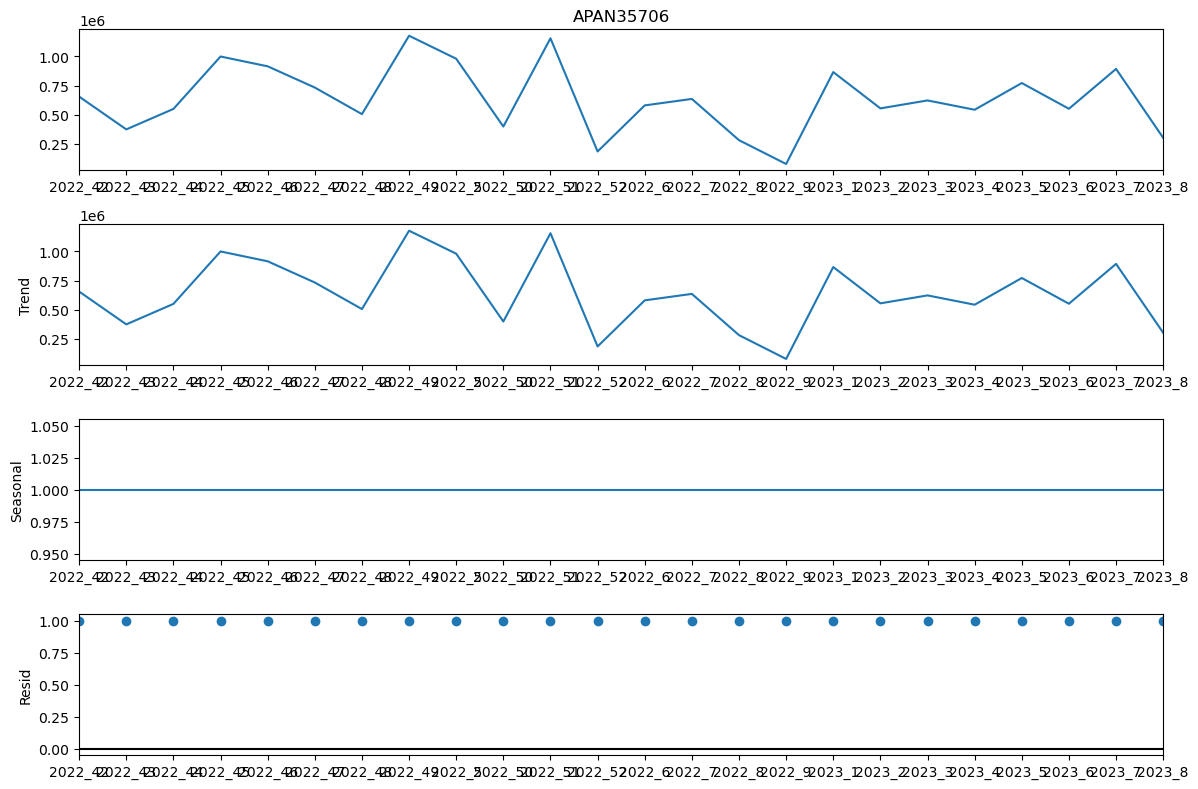

ATMID: APCN00816


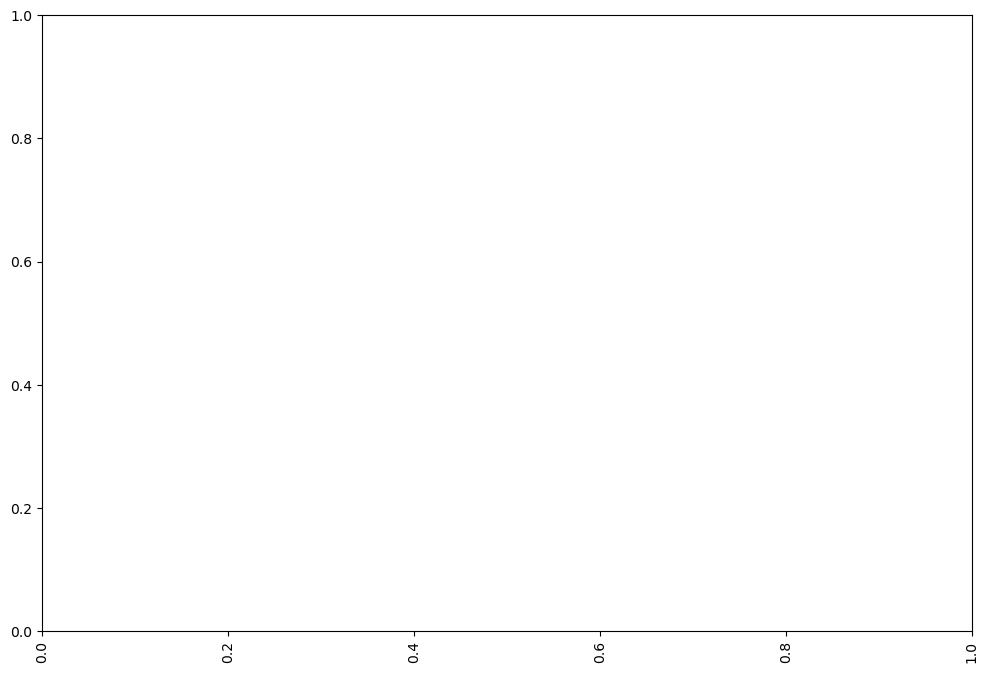

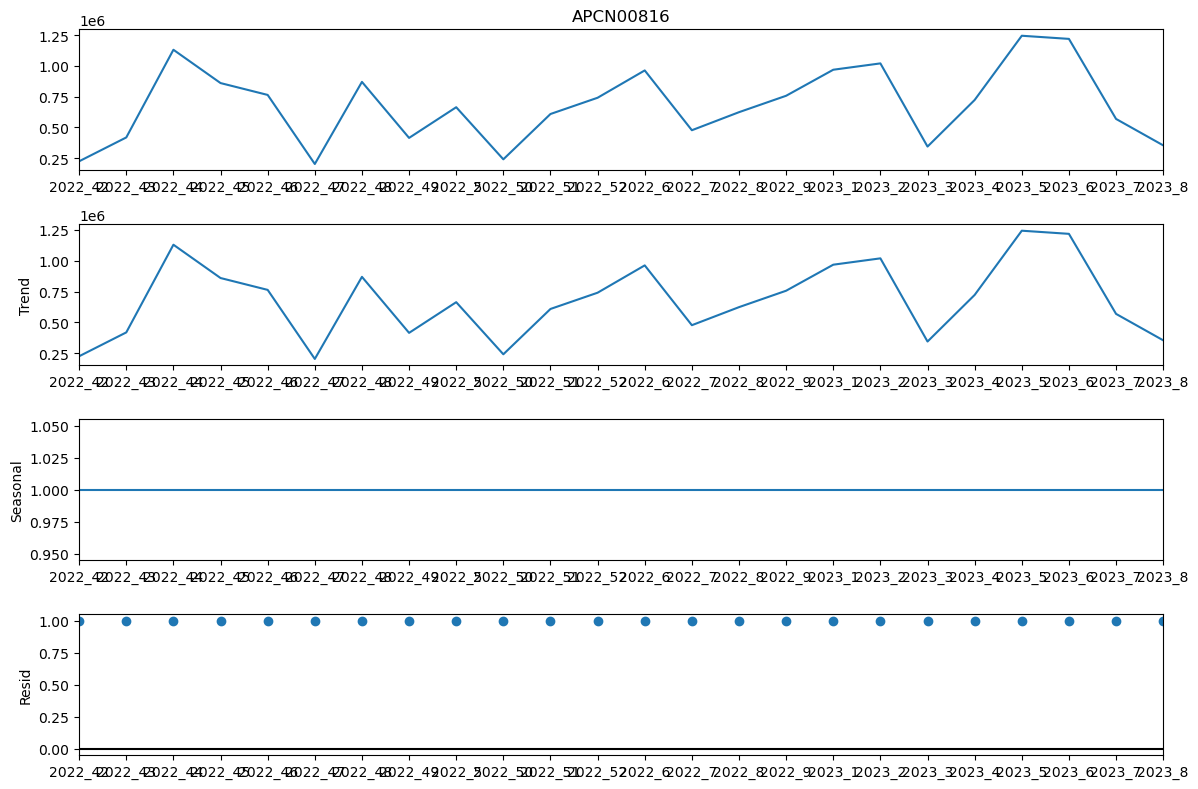

ATMID: S1CN1142
Multiplicative seasonality is not appropriate for zero and negative values
ATMID: S1CN2011


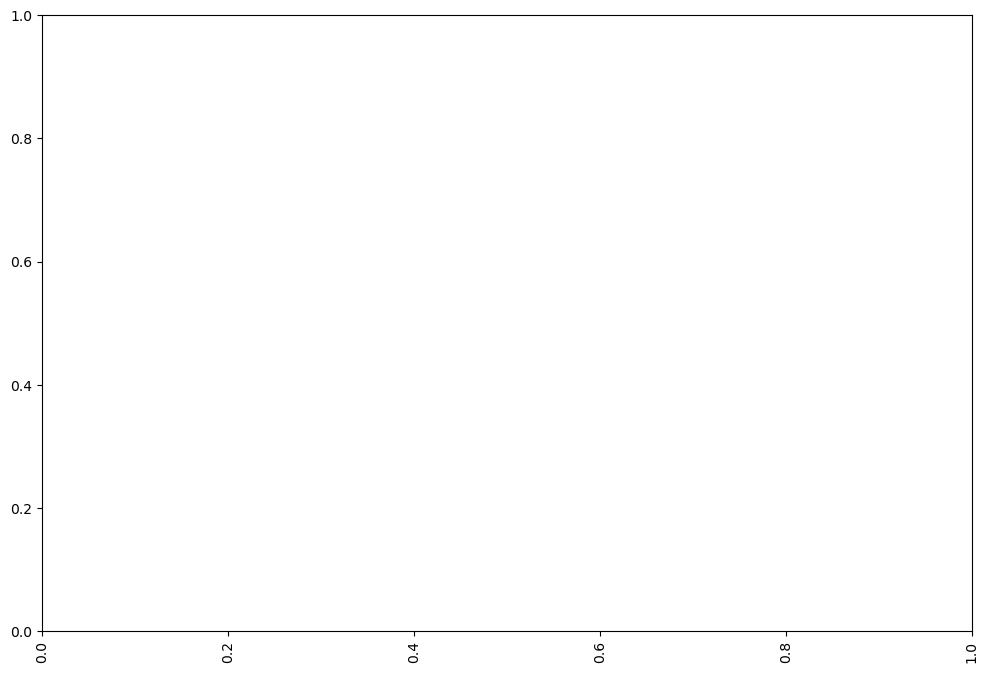

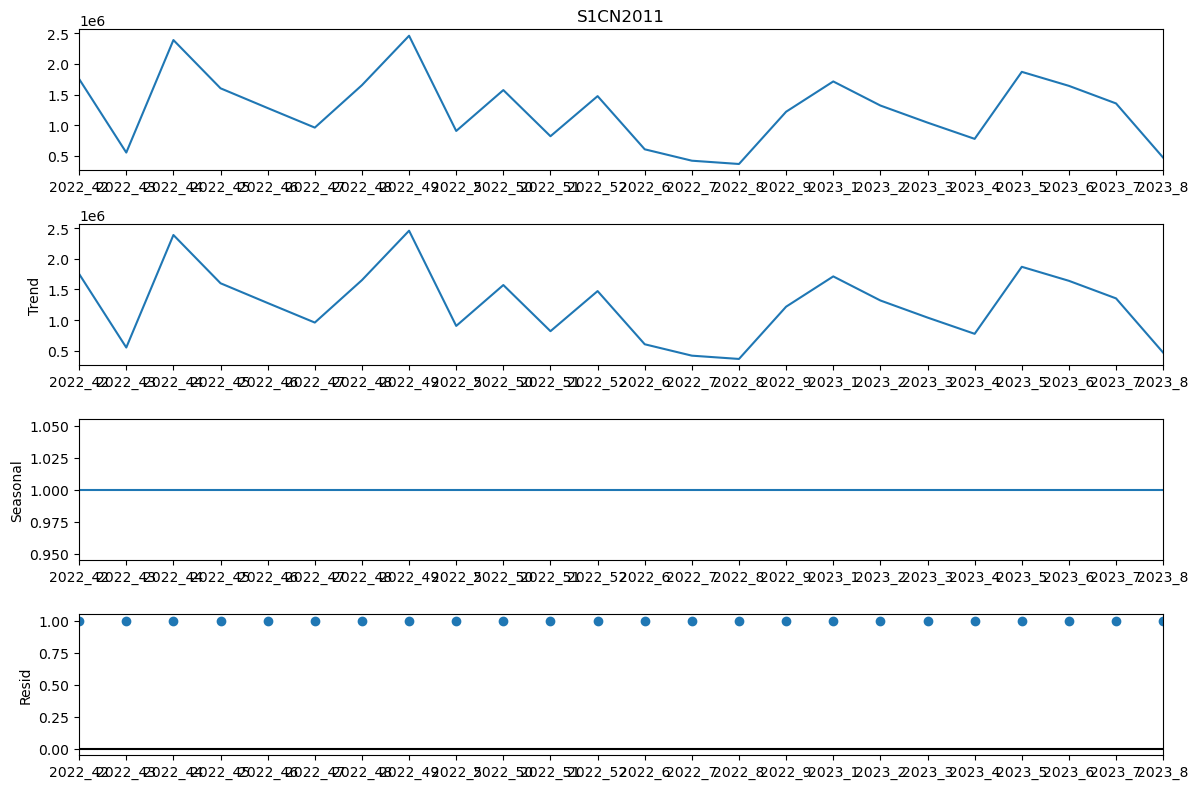

ATMID: S1CN2022


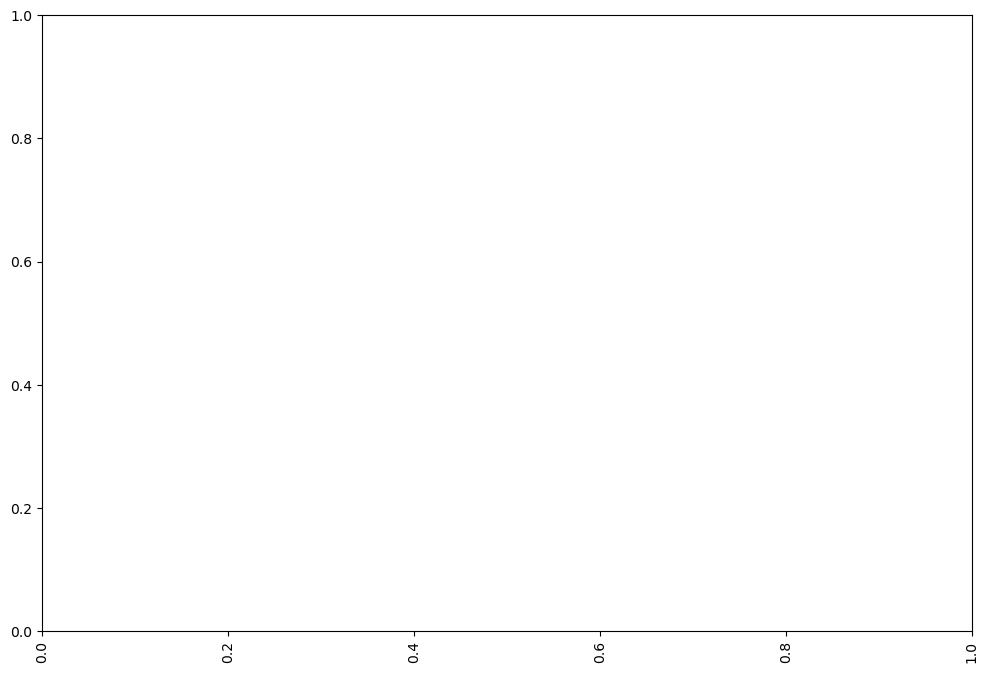

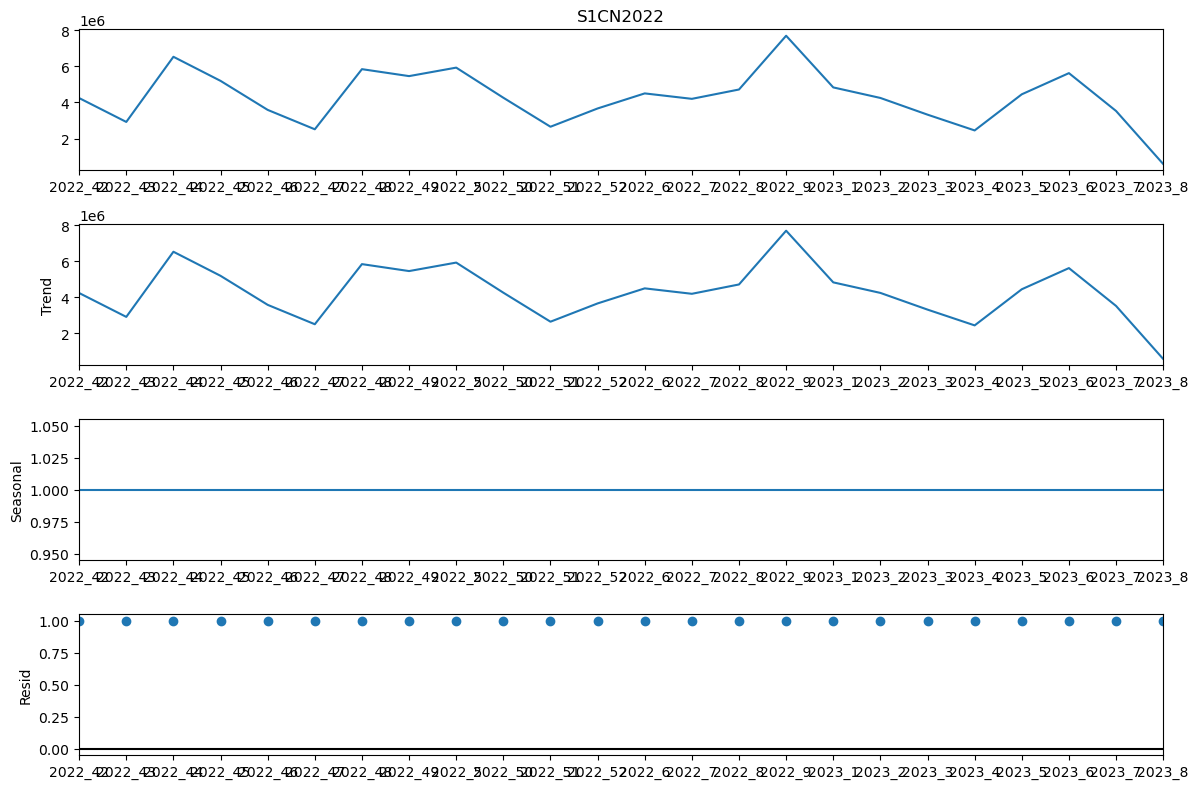

ATMID: S1CN2820
Multiplicative seasonality is not appropriate for zero and negative values
ATMID: S1CN3514


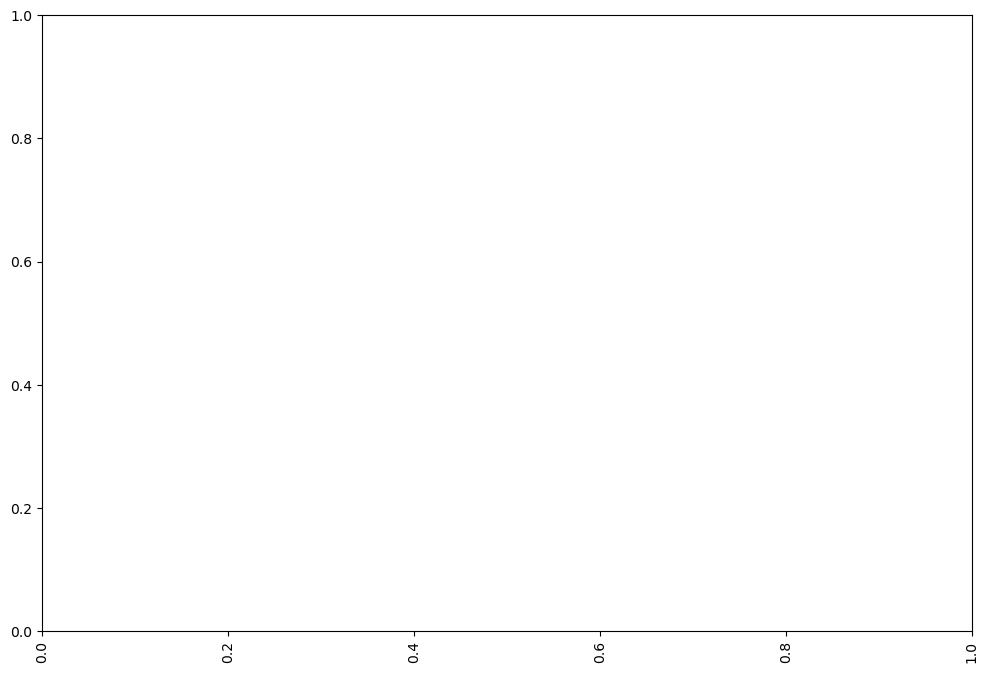

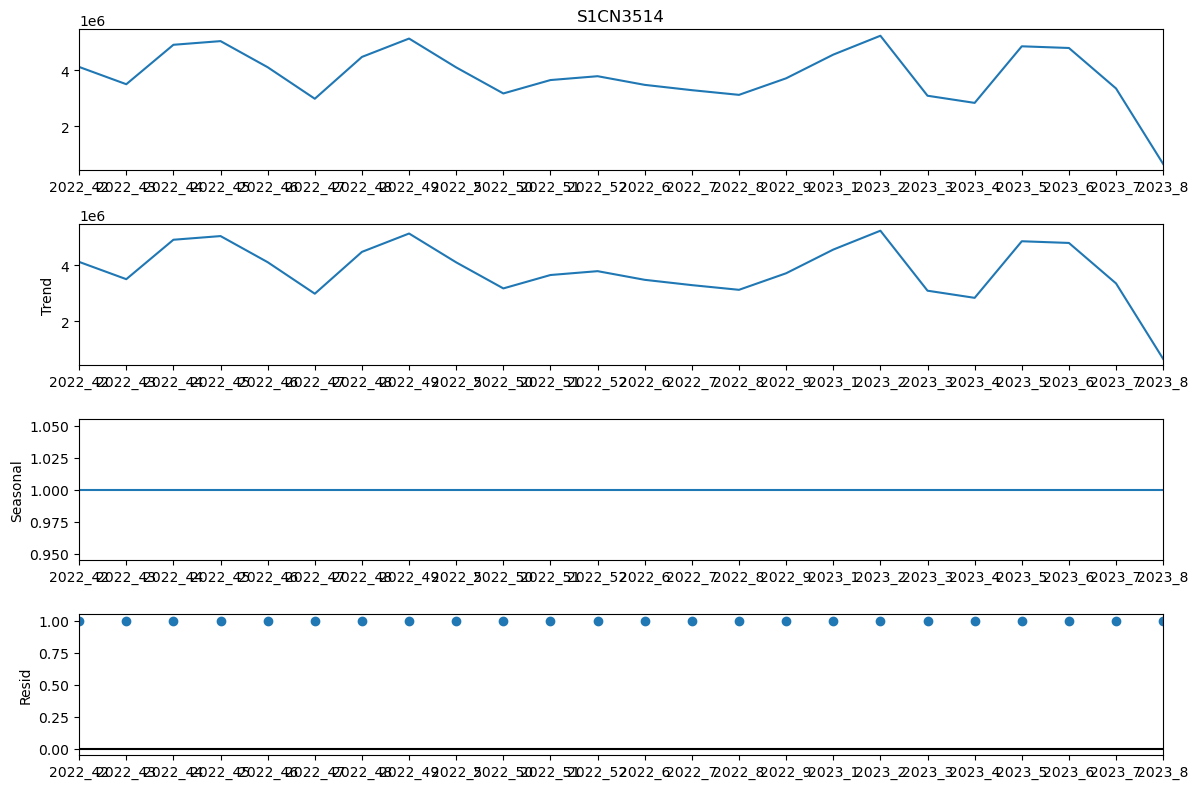

ATMID: SPCN02020


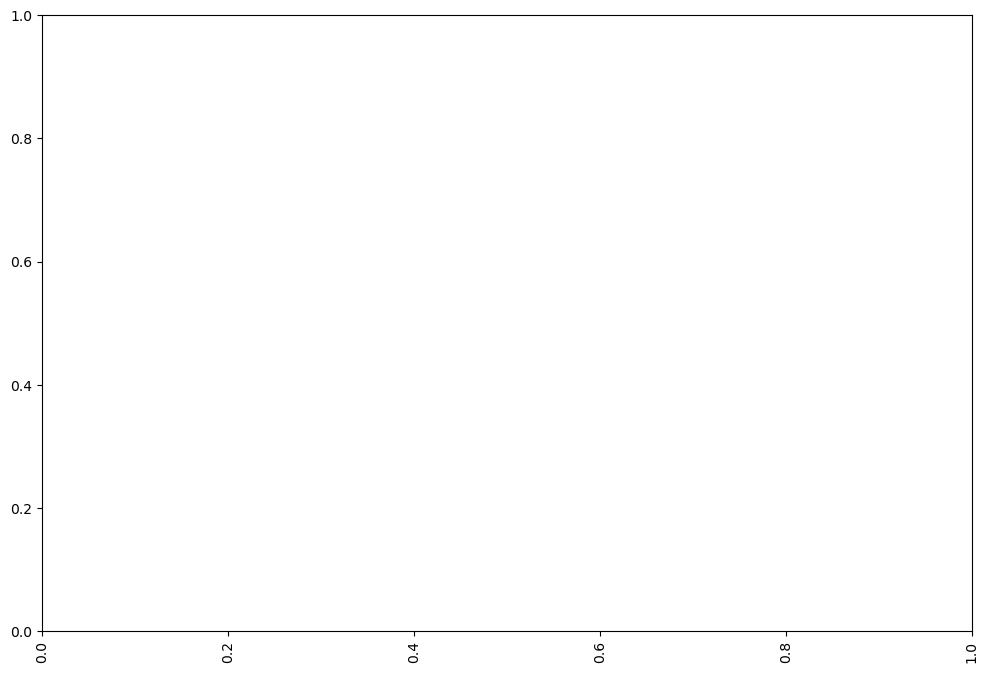

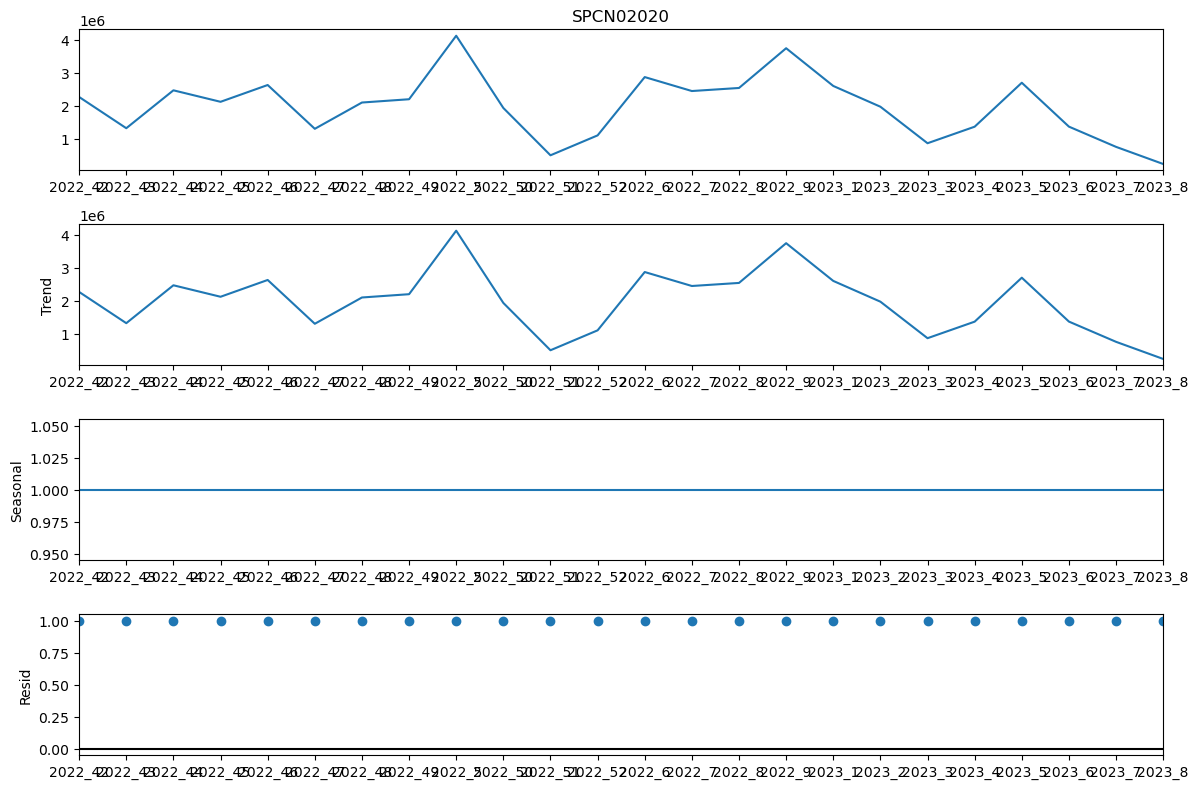

ATMID: SPCND067


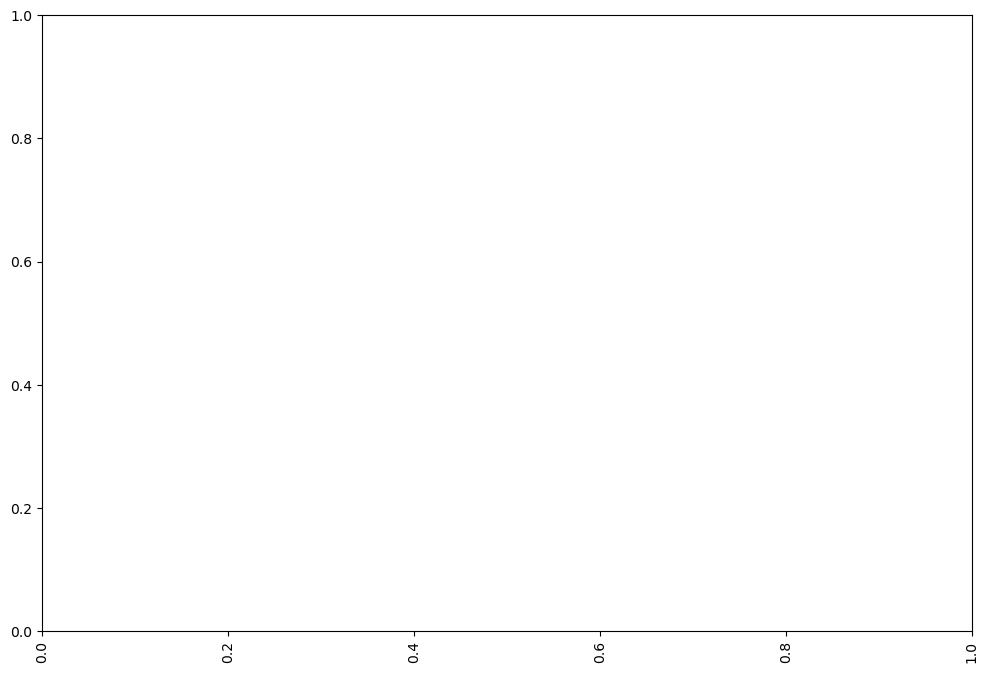

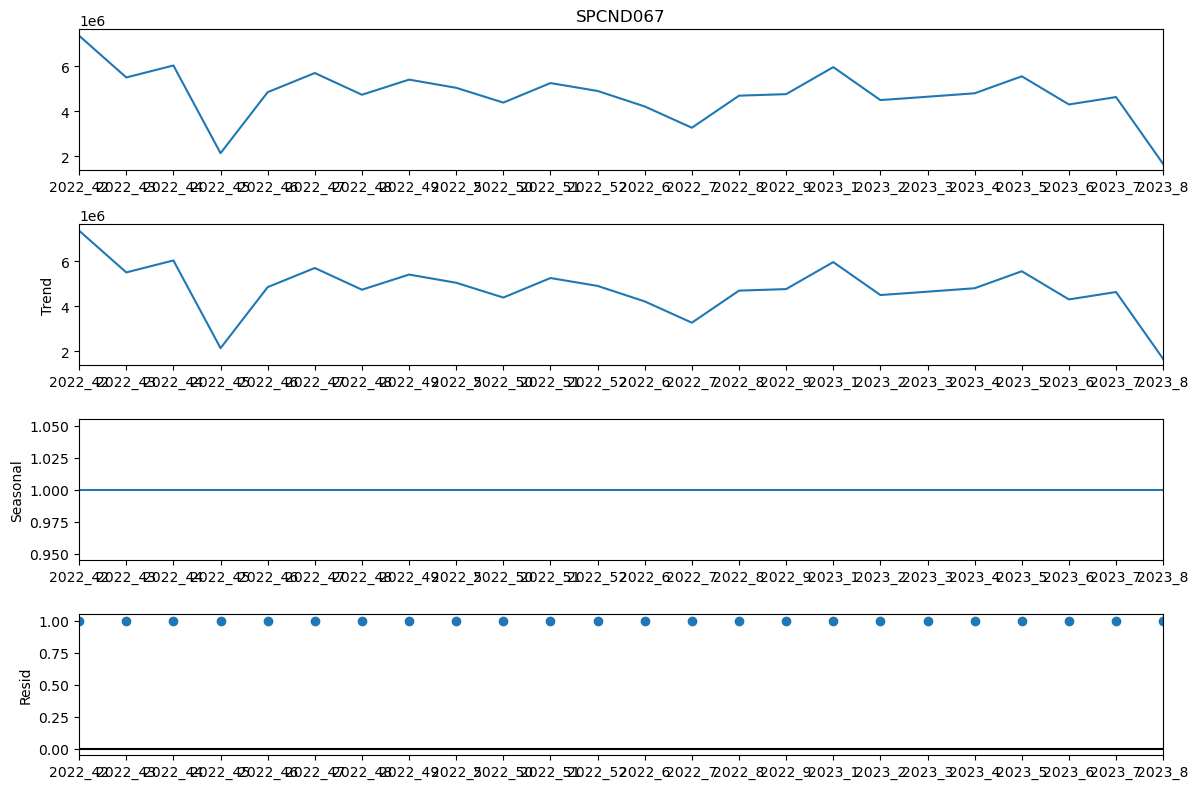

ATMID: SPCNG376


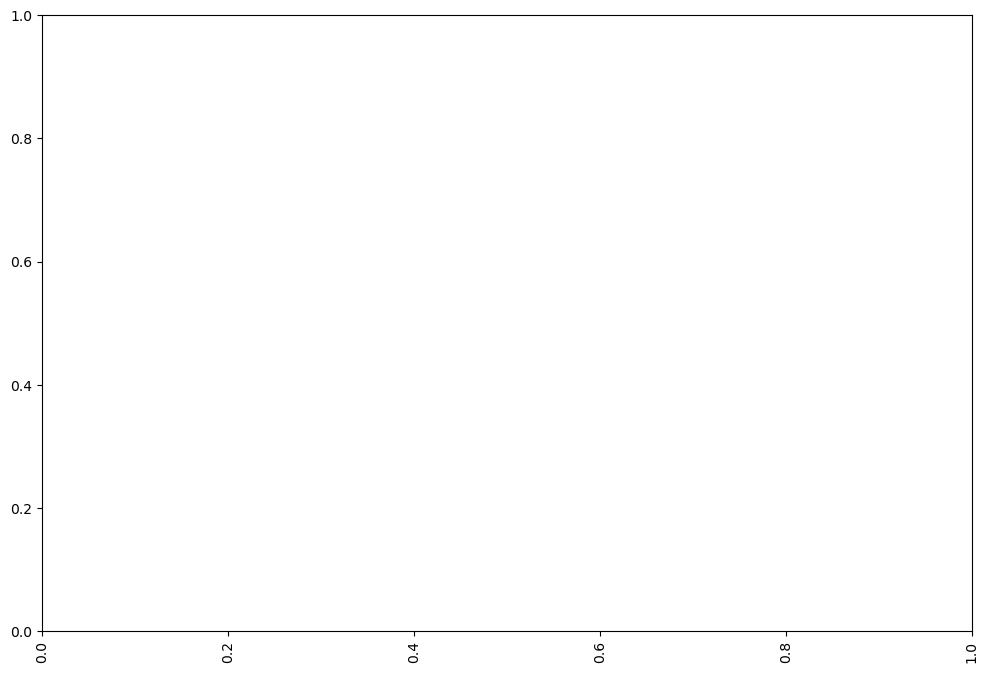

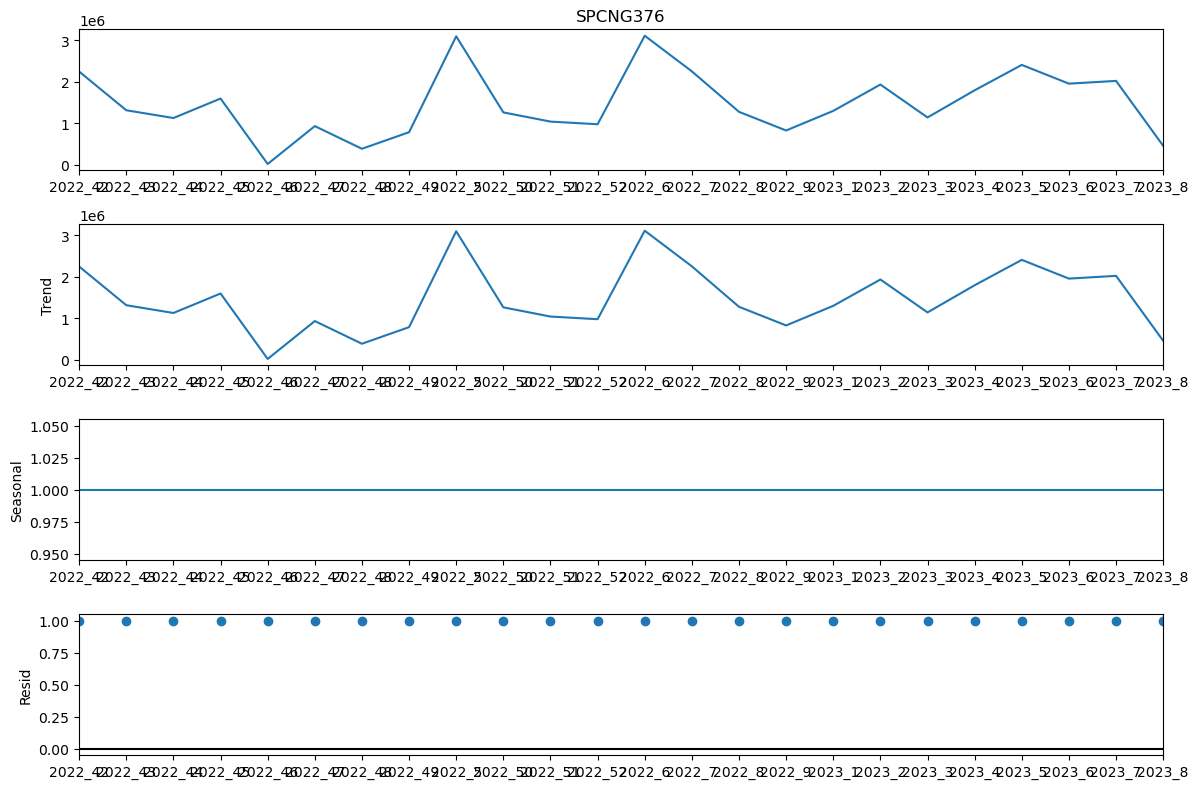

ATMID: T1BH000003039
This function does not handle missing values
ATMID: T1BH000011116


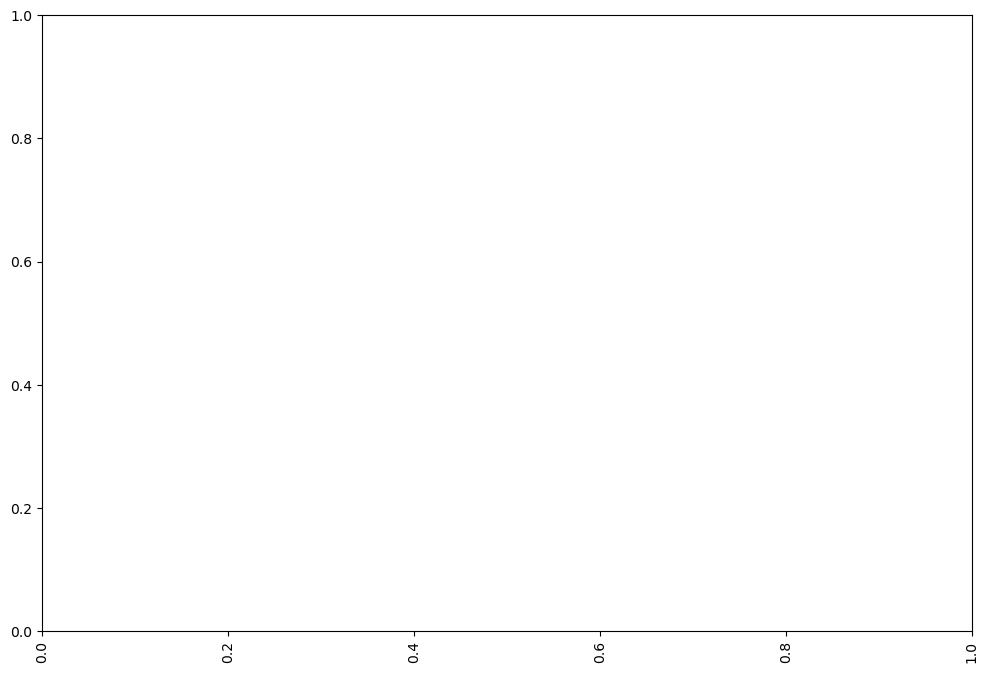

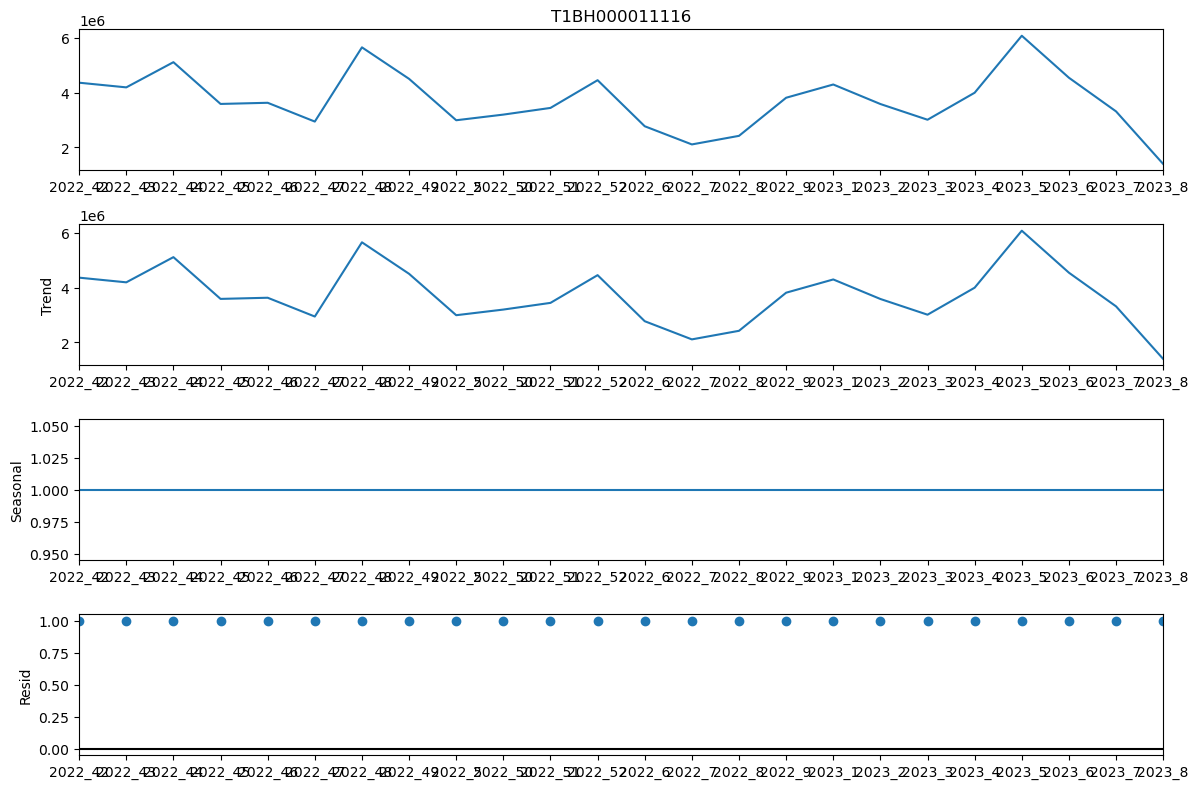

ATMID: T1BH000274012


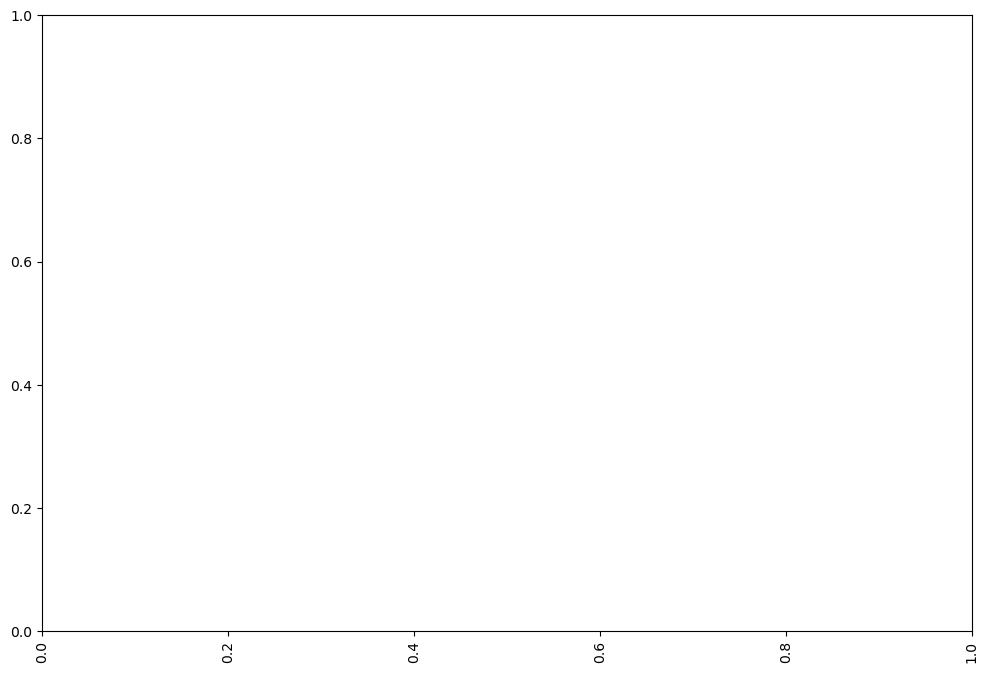

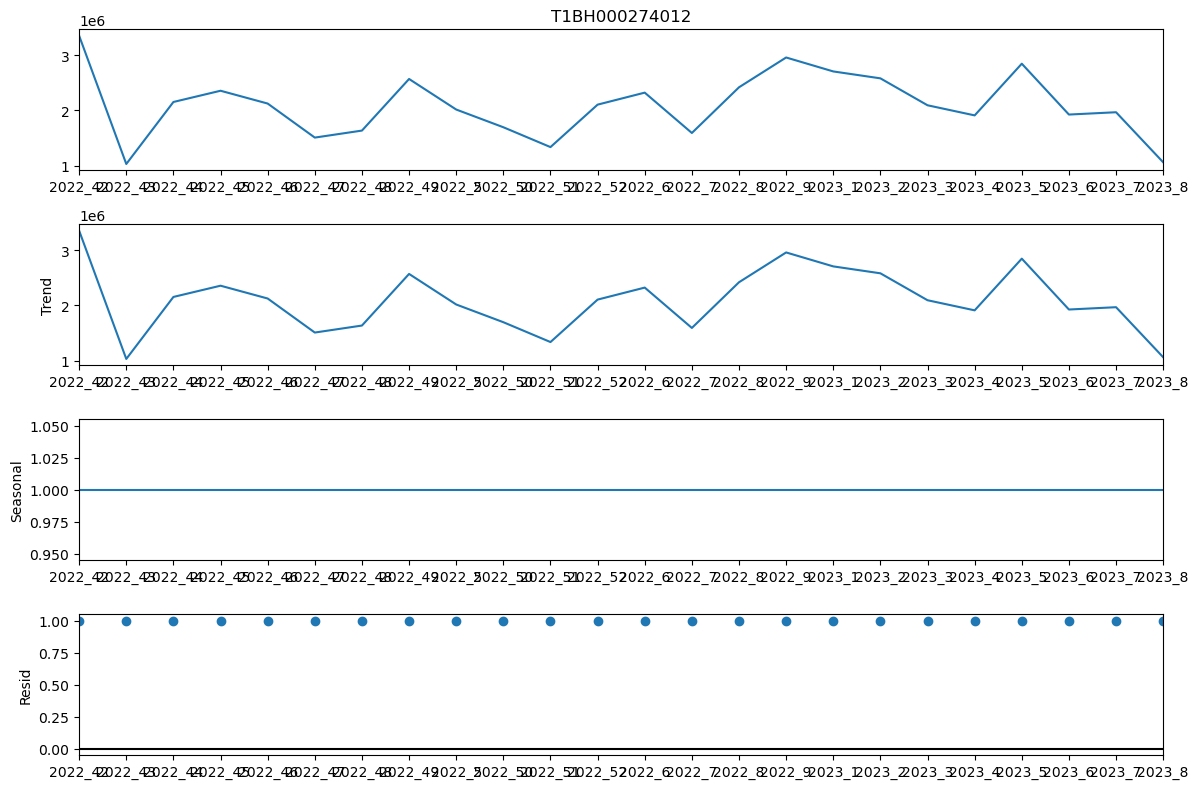

ATMID: T1BH000603091


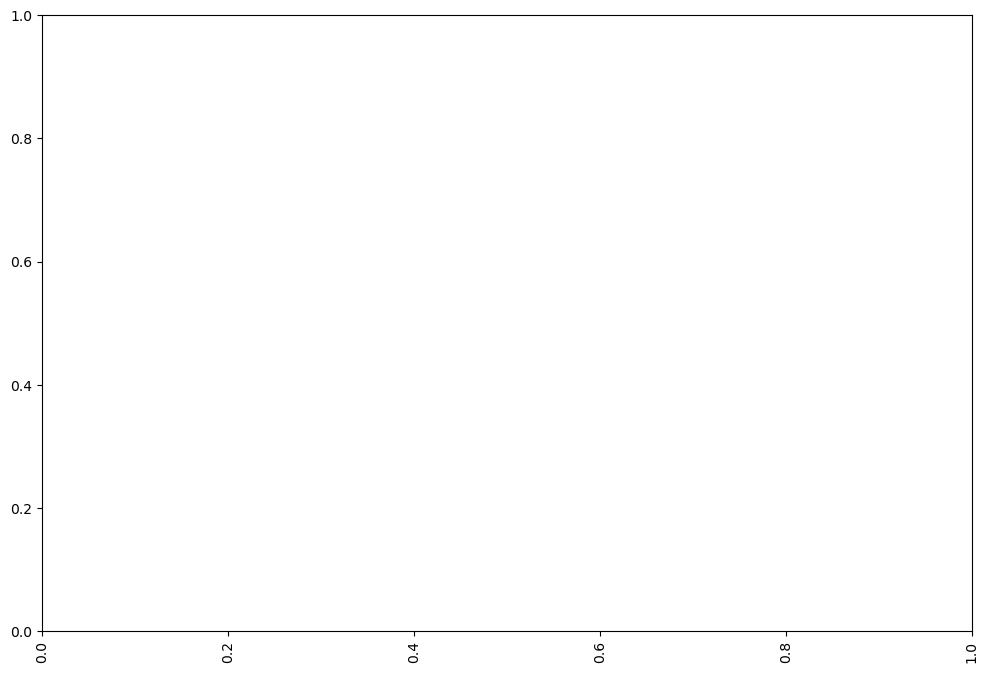

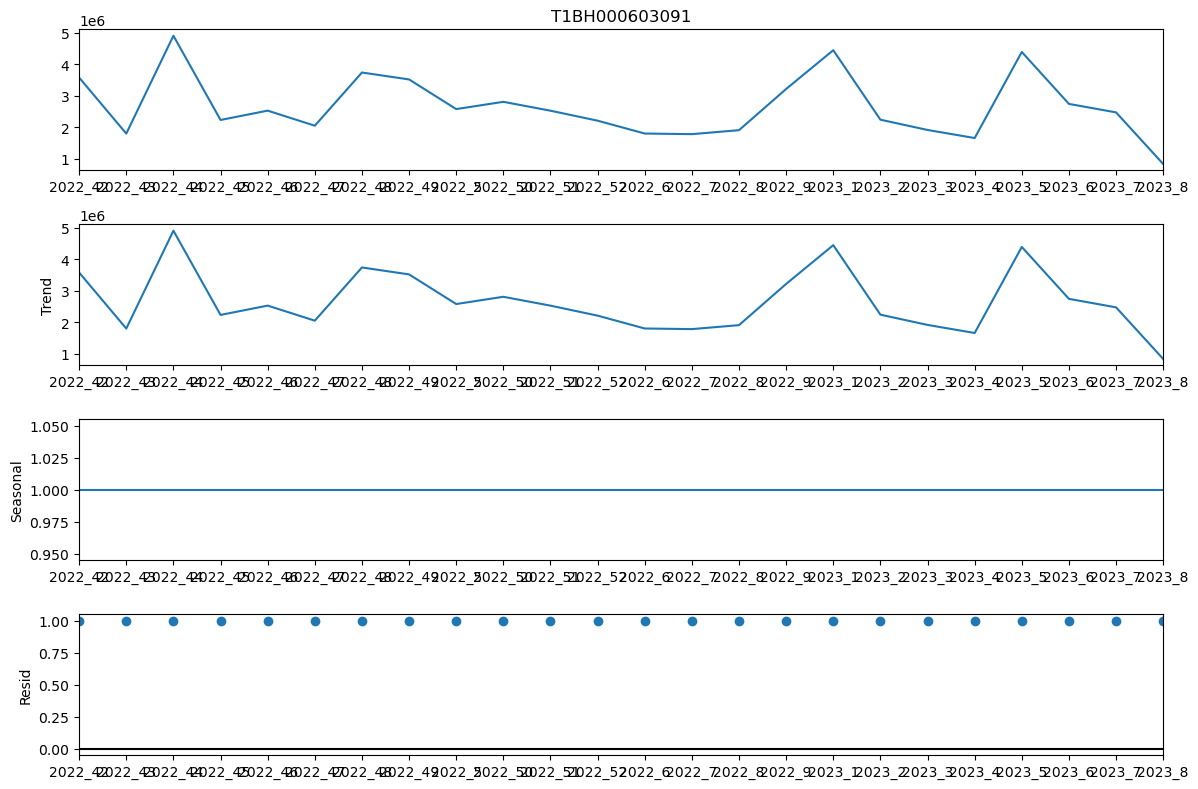

ATMID: T1BH007252090


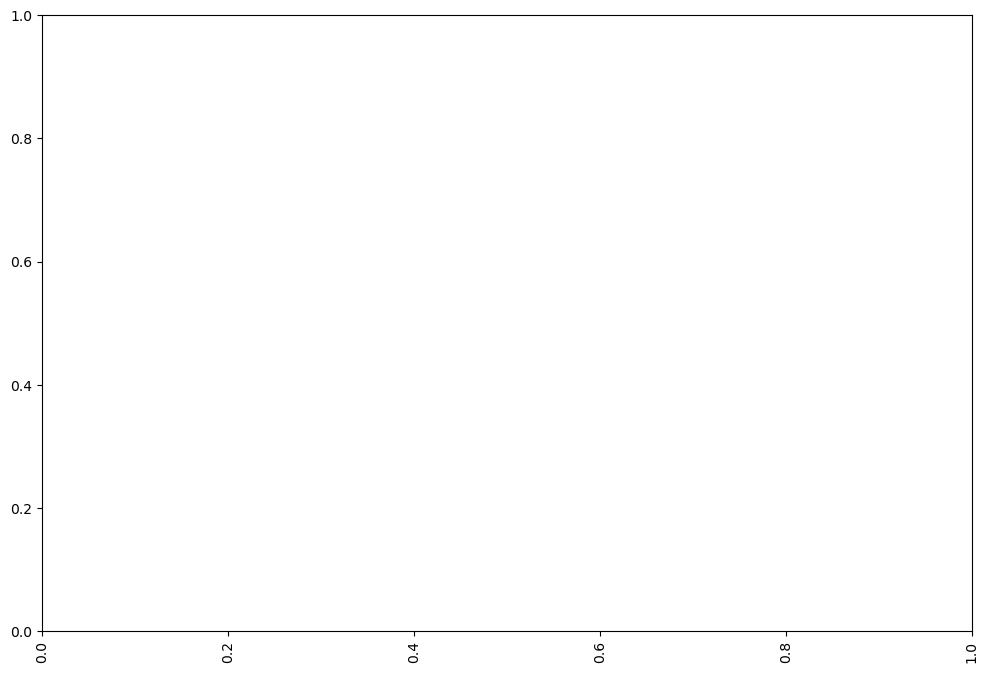

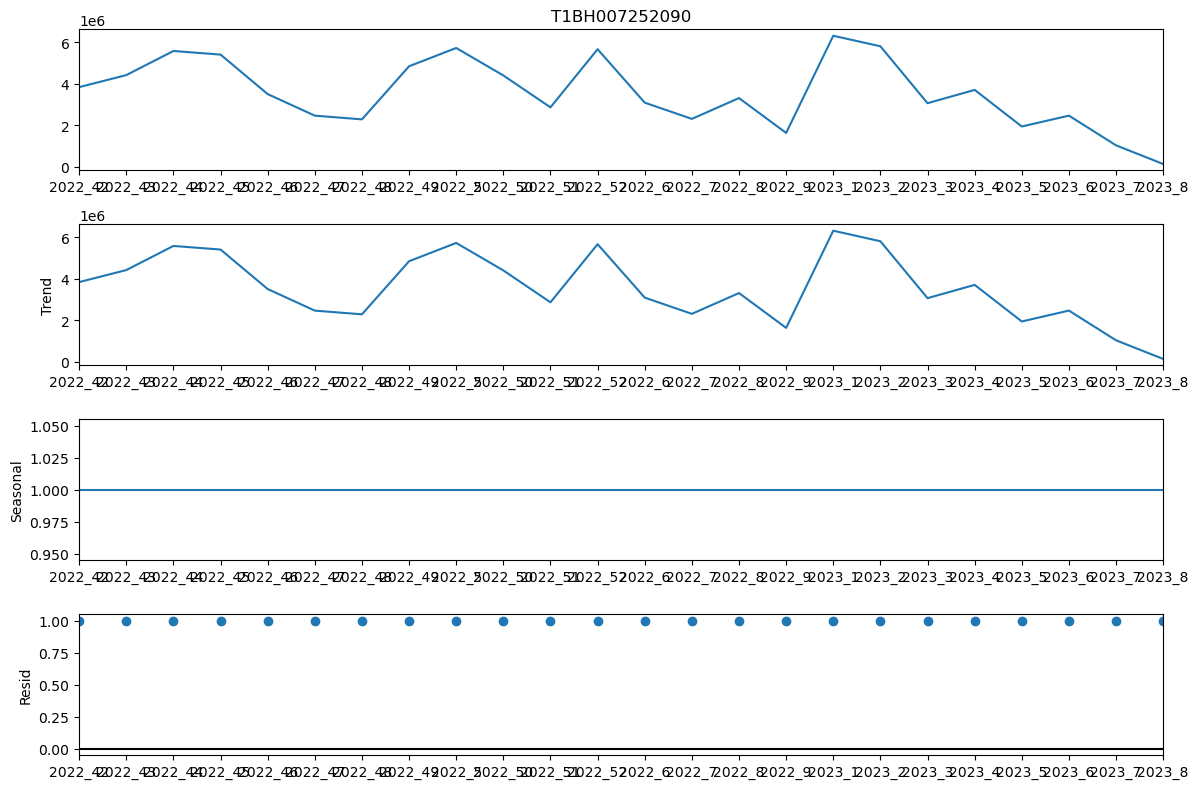

ATMID: T1NH000575414


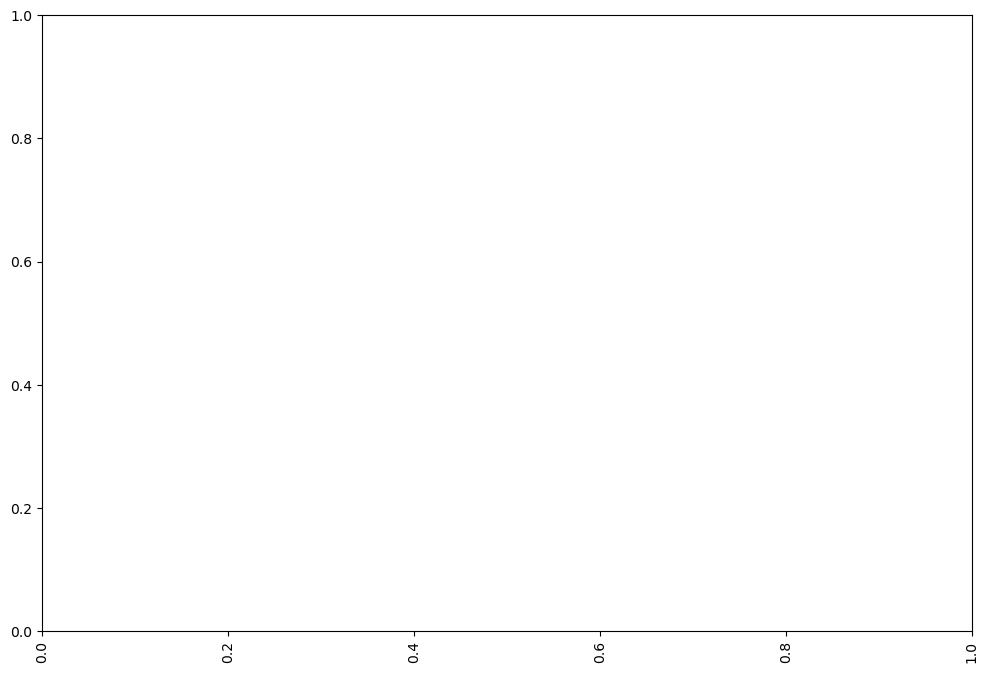

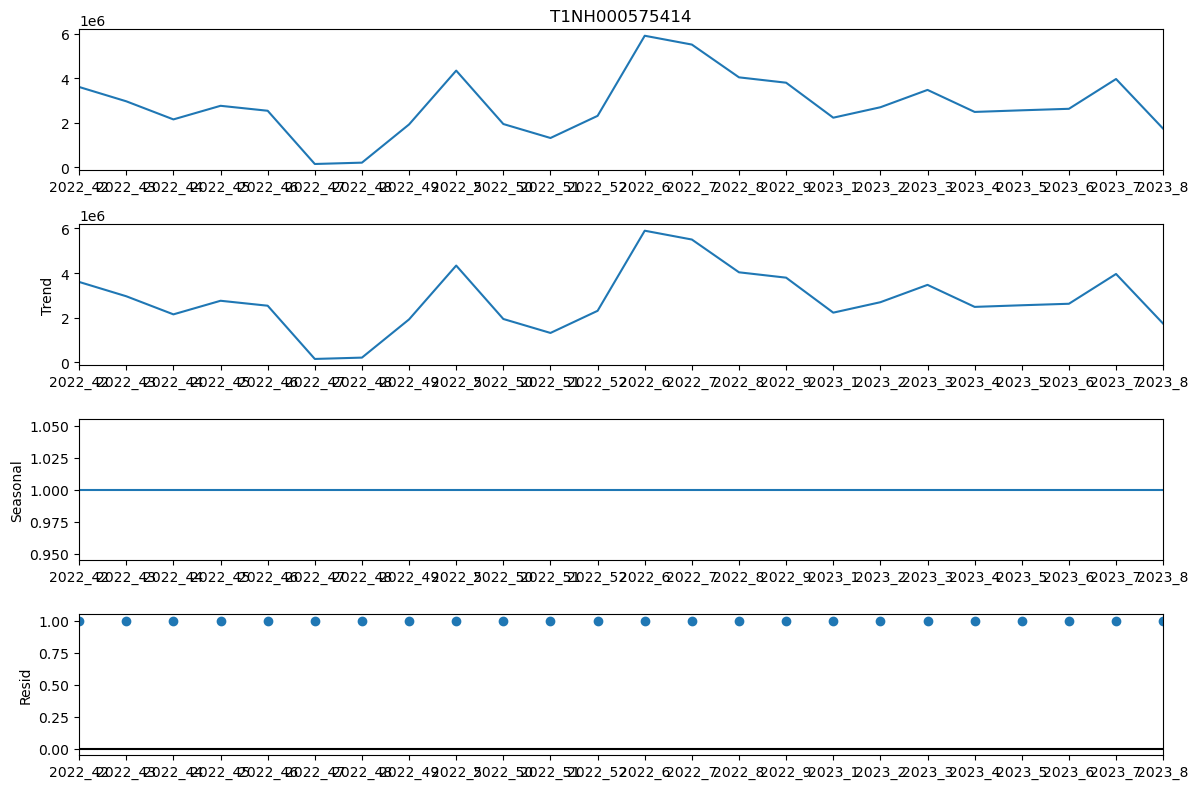

ATMID: T1NY000166081


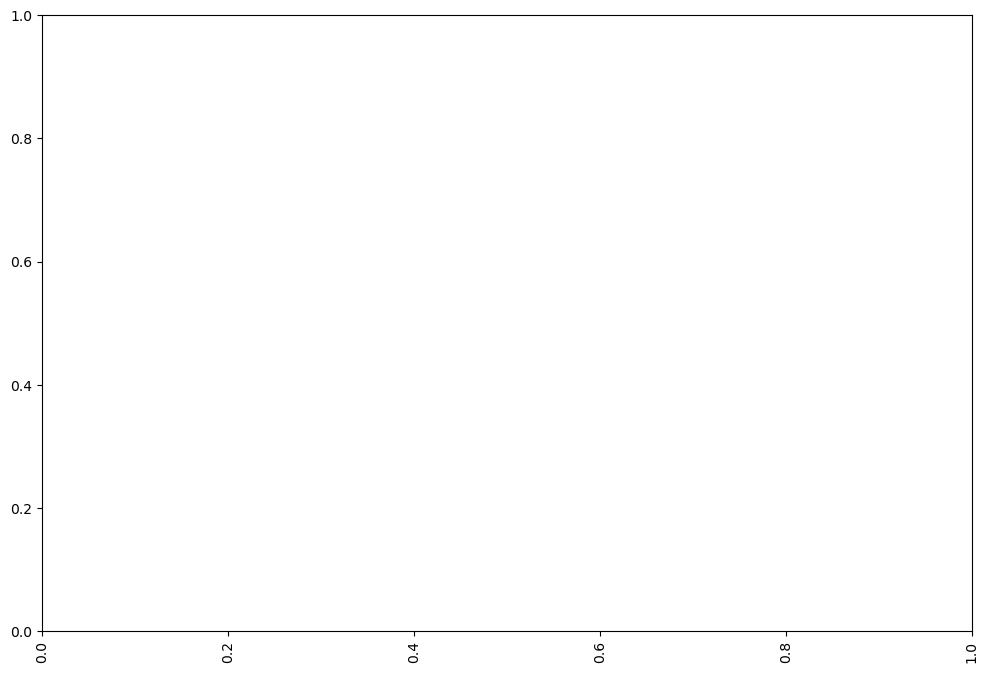

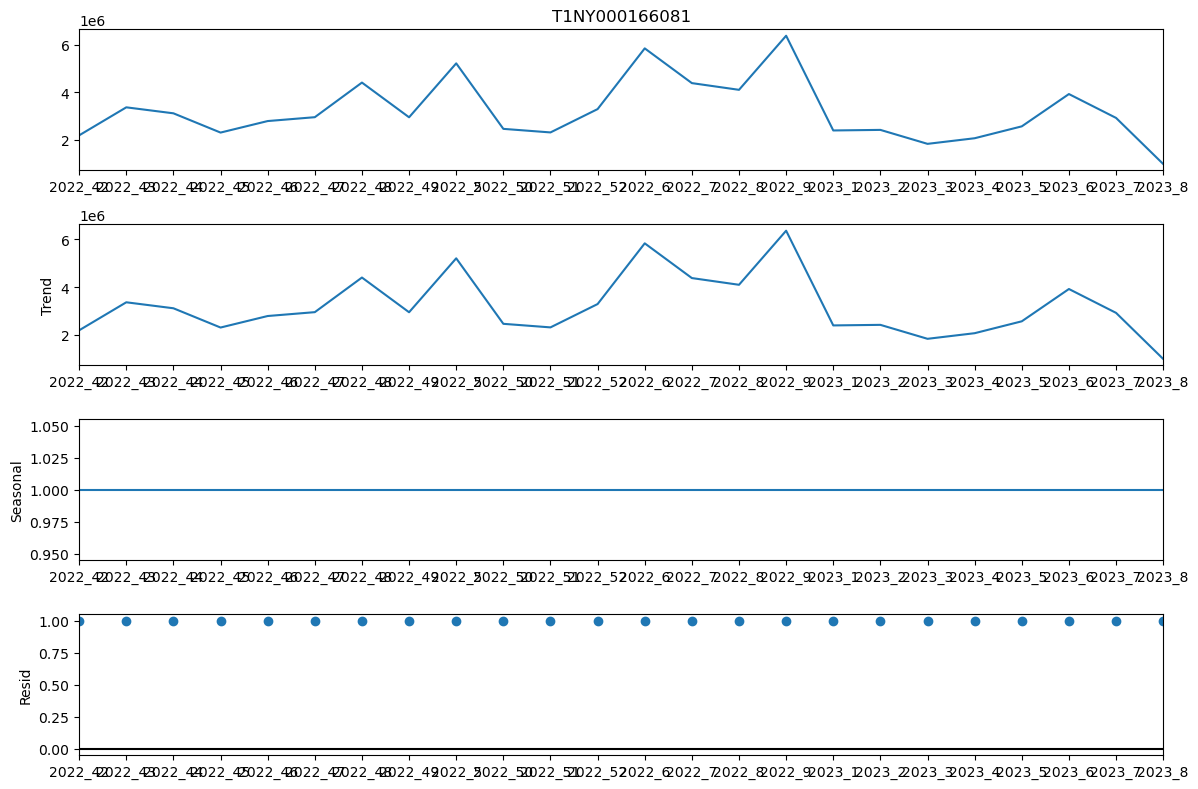

ATMID: TPCN10269


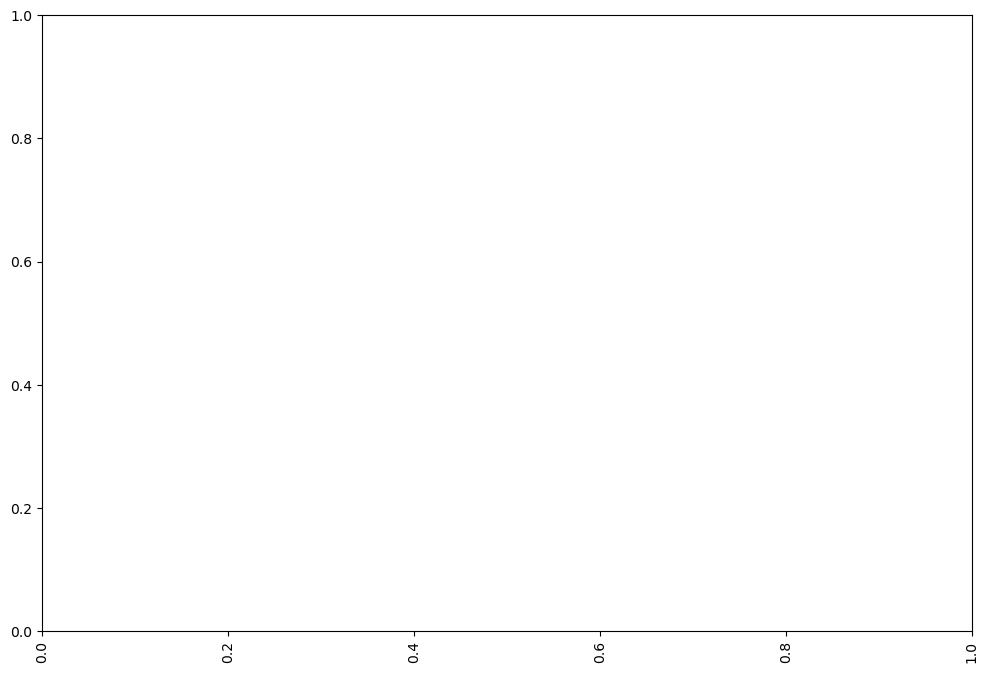

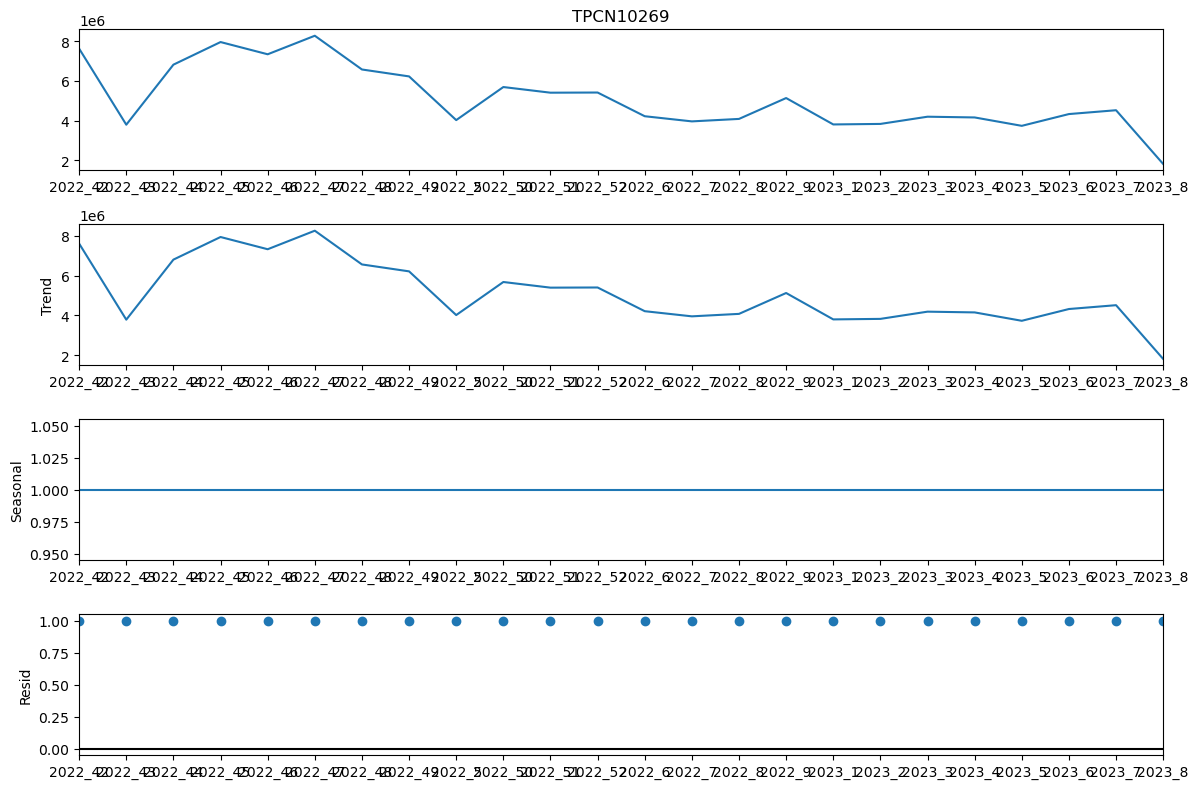

In [19]:
for atm in agg_weeklevel_data['ATMID'].unique():
    try:
        print('ATMID:', atm)
        rcParams['figure.figsize'] = 12,8
        plt.xticks(rotation=90)
        decomposiotion = sm.tsa.seasonal_decompose(x=last_24_week_dispense[atm],period=1, model='multiplicative')
        fig = decomposiotion.plot()
        plt.show()
    except Exception as e:
        print(e)
        pass